<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goal-of-Project" data-toc-modified-id="Goal-of-Project-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal of Project</a></span></li><li><span><a href="#Description-of-the-data" data-toc-modified-id="Description-of-the-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Description of the data</a></span></li><li><span><a href="#import-libraries-and-data" data-toc-modified-id="import-libraries-and-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>import libraries and data</a></span></li><li><span><a href="#Product" data-toc-modified-id="Product-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Product</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#How-many-people-use-it-every-day,-week,-and-month?" data-toc-modified-id="How-many-people-use-it-every-day,-week,-and-month?-4.0.1"><span class="toc-item-num">4.0.1&nbsp;&nbsp;</span>How many people use it every day, week, and month?</a></span></li><li><span><a href="#How-many-sessions-are-there-per-day?-(One-user-might-have-more-than-one-session.)" data-toc-modified-id="How-many-sessions-are-there-per-day?-(One-user-might-have-more-than-one-session.)-4.0.2"><span class="toc-item-num">4.0.2&nbsp;&nbsp;</span>How many sessions are there per day? (One user might have more than one session.)</a></span></li><li><span><a href="#What-is-the-length-of-each-session?" data-toc-modified-id="What-is-the-length-of-each-session?-4.0.3"><span class="toc-item-num">4.0.3&nbsp;&nbsp;</span>What is the length of each session?</a></span></li><li><span><a href="#How-often-do-users-come-back?" data-toc-modified-id="How-often-do-users-come-back?-4.0.4"><span class="toc-item-num">4.0.4&nbsp;&nbsp;</span>How often do users come back?</a></span></li></ul></li></ul></li><li><span><a href="#Sales" data-toc-modified-id="Sales-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Sales</a></span><ul class="toc-item"><li><span><a href="#When-do-people-start-buying?" data-toc-modified-id="When-do-people-start-buying?-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>When do people start buying?</a></span></li><li><span><a href="#How-many-orders-do-they-make-during-a-given-period-of-time?" data-toc-modified-id="How-many-orders-do-they-make-during-a-given-period-of-time?-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>How many orders do they make during a given period of time?</a></span></li><li><span><a href="#What-is-the-average-purchase-size?" data-toc-modified-id="What-is-the-average-purchase-size?-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>What is the average purchase size?</a></span></li><li><span><a href="#How-much-money-do-they-bring?-(LTV)" data-toc-modified-id="How-much-money-do-they-bring?-(LTV)-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>How much money do they bring? (LTV)</a></span></li></ul></li><li><span><a href="#Marketing" data-toc-modified-id="Marketing-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Marketing</a></span><ul class="toc-item"><li><span><a href="#How-much-money-was-spent?-Overall/per-source/over-time" data-toc-modified-id="How-much-money-was-spent?-Overall/per-source/over-time-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>How much money was spent? Overall/per source/over time</a></span></li><li><span><a href="#How-much-did-customer-acquisition-from-each-of-the-sources-cost?-(CAC)" data-toc-modified-id="How-much-did-customer-acquisition-from-each-of-the-sources-cost?-(CAC)-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>How much did customer acquisition from each of the sources cost? (CAC)</a></span></li><li><span><a href="#How-worthwhile-were-the-investments?-(ROI)" data-toc-modified-id="How-worthwhile-were-the-investments?-(ROI)-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>How worthwhile were the investments? (ROI)</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

## Goal of Project

> __the goal of this project is to help optimize marketing expenses for Yandex.Afisha, by analyzing costumers and product behavior.__

## Description of the data

>__The data contains:__

>* Server logs with data on Yandex.Afisha visits from June 2017 through May 2018

>* Dump file with all orders for the period

>* Marketing expenses statistics

<br>

__The visits table (server logs with data on website visits):__

`Uid` — user's unique identifier

`Device` — user's device

`Start Ts` — session start date and time

`End Ts` — session end date and time

`Source Id` — identifier of the ad source the user came from

All dates in this table are in YYYY-MM-DD format.

<br>

__The orders table (data on orders):__

`Uid` — unique identifier of the user making an order

`Buy Ts` — order date and time

`Revenue` — Yandex.Afisha's revenue from the order

<br>

__The costs table (data on marketing expenses):__

`source_id` — ad source identifier

`dt` — date

`costs` — expenses on this ad source on this day


## import libraries and data

In [1]:
# import libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')


In [2]:
# loading data

try:
    visits = pd.read_csv('D:\\הורדות\\visits_log_us.csv',
    dtype={'Device': 'category'},
    parse_dates=['Start Ts', 'End Ts'])
    
    orders= pd.read_csv('D:\\הורדות\\orders_log_us.csv',
    parse_dates=['Buy Ts'])
    
    costs = pd.read_csv('D:\\הורדות\\costs_us.csv',
    parse_dates=['dt'])
    
except:
    visits = pd.read_csv('/datasets/visits_log_us.csv',
    dtype={'Device': 'category'},
    parse_dates=['Start Ts', 'End Ts'])
    
    orders= pd.read_csv('/datasets/orders_log_us.csv',
    parse_dates=['Buy Ts'])
    
    costs= pd.read_csv('/datasets/costs_us.csv',
    parse_dates=['dt'])

In [3]:
# checking for missing values and data types

visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


In [4]:
# checking for missing values and data types

orders.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [5]:
# checking for missing values and data types

costs.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


# Make reports and calculate metrics

## Product

#### How many people use it every day, week, and month?

In [6]:
# getting the first visit 

first_visit = visits.groupby('Uid')['Start Ts'].min()
first_visit.name = 'first_visit'

# adding the first visit to visits data

visits = visits.join(first_visit, on='Uid')

In [7]:
# add month columns
visits['visit_month'] = visits['Start Ts'].astype('datetime64[M]')

In [8]:
# getting the first visit month

first_visit_month = visits.groupby('Uid')['visit_month'].min()
first_visit_month.name = 'first_visit_month'

# adding the first visit month to visits data

visits = visits.join(first_visit_month, on='Uid')

In [9]:
# add year column

visits['visit_year'] = visits['Start Ts'].dt.year

# add week column

visits['visit_week'] = visits['Start Ts'].astype('datetime64[W]')

# add day column

visits['visit_date'] = visits['Start Ts'].astype('datetime64[D]')

# change visit_date to datetime
visits['visit_date'] = pd.to_datetime(visits['visit_date'])

In [10]:
# getting the first visit date

first_visit_date = visits.groupby('Uid')['visit_date'].min()
first_visit_date.name = 'first_visit_date'

# adding the first visit date to visits data

visits = visits.join(first_visit_date, on='Uid')

In [11]:
# separating data by device

desktop = visits[visits['Device'] == 'desktop']
touch = visits[visits['Device'] == 'touch']

In [12]:
# getting the average daily visits

dau_mean = visits.groupby('visit_date').agg({'Uid': 'nunique'}).mean()

# getting the average daily visits per device

desktop_dau_mean = desktop.groupby('visit_date').agg({'Uid': 'nunique'}).mean()
touch_dau_mean = touch.groupby('visit_date').agg({'Uid': 'nunique'}).mean()

In [13]:
# getting the average weekly visits

wau_mean = visits.groupby(['visit_year', 'visit_week']).agg({'Uid': 'nunique'}).mean()

# getting the average weekly visits per device

desktop_wau_mean = desktop.groupby(['visit_year', 'visit_week']).agg({'Uid': 'nunique'}).mean()
touch_wau_mean = touch.groupby(['visit_year', 'visit_week']).agg({'Uid': 'nunique'}).mean()

In [14]:
# getting the average monthly visits

mau_mean = visits.groupby(['visit_year', 'visit_month']).agg({'Uid': 'nunique'}).mean()

# getting the average monthly visits per device

desktop_mau_mean = desktop.groupby(['visit_year', 'visit_month']).agg({'Uid': 'nunique'}).mean()
touch_mau_mean = touch.groupby(['visit_year', 'visit_month']).agg({'Uid': 'nunique'}).mean()

In [15]:
# printing the results

print('Total Active Users:')
print('')
print('Daily Active Users:', dau_mean)
print('Desktop Daily Active Users:', desktop_dau_mean)
print('Touch Daily Active Users:', touch_dau_mean)
print('')
print('Desktop Active Users:')
print('')
print('Weekly Active Users:', wau_mean)
print('Desktop Weekly Active Users:', desktop_wau_mean)
print('Touch Weekly Active Users:', touch_wau_mean)
print('')
print('Touch Active Users:')
print('')
print('Monthly Active Users:', mau_mean)
print('Desktop Monthly Active Users:', desktop_mau_mean)
print('Touch Monthly Active Users:', touch_mau_mean)

Total Active Users:

Daily Active Users: Uid    907.991758
dtype: float64
Desktop Daily Active Users: Uid    659.244505
dtype: float64
Touch Daily Active Users: Uid    252.873278
dtype: float64

Desktop Active Users:

Weekly Active Users: Uid    5621.703704
dtype: float64
Desktop Weekly Active Users: Uid    4061.5
dtype: float64
Touch Weekly Active Users: Uid    1607.740741
dtype: float64

Touch Active Users:

Monthly Active Users: Uid    23228.416667
dtype: float64
Desktop Monthly Active Users: Uid    16724.916667
dtype: float64
Touch Monthly Active Users: Uid    6825.916667
dtype: float64


In [16]:
# getting daily unique users

dau_count = visits.groupby('visit_date').agg({'Uid': 'nunique'}).reset_index()

In [17]:
# getting daily unique users per device

dau_desktop_count = desktop.groupby('visit_date').agg({'Uid': 'nunique'}).reset_index()
dau_desktop_count = dau_desktop_count.rename(columns={'Uid': 'desktop'})

dau_touch_count = touch.groupby('visit_date').agg({'Uid': 'nunique'}).reset_index()
dau_touch_count = dau_touch_count.rename(columns={'Uid': 'touch'})

# merging daily unique users per device

dau_device_count = dau_desktop_count.merge(dau_touch_count, on='visit_date')

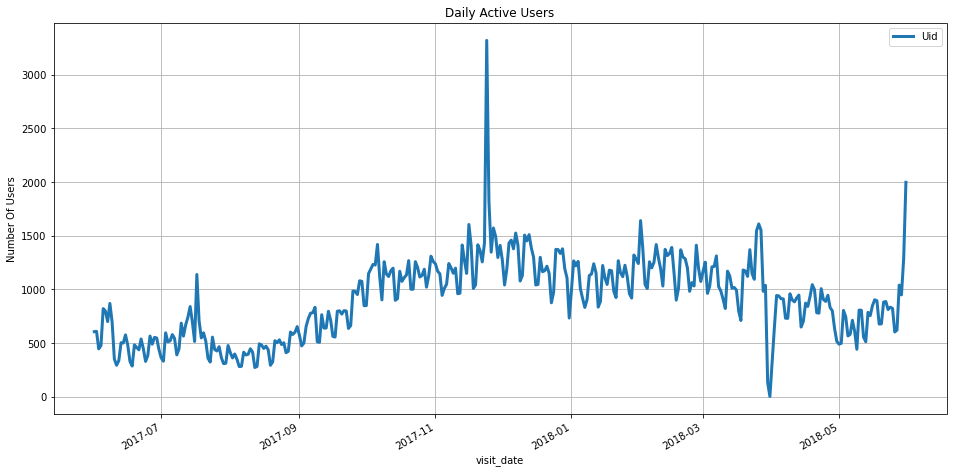

In [18]:
# visualize daily unique users

dau_count.set_index('visit_date').plot(figsize=(16,8), grid=True, fontsize=10, lw=3)
plt.title('Daily Active Users')
plt.ylabel('Number Of Users')
plt.show()

In [19]:


# visualize daily unique users in plotly with average


#fig = px.line(dau_count,x="visit_date", y="Uid",title='DAU')

#fig.add_hline(y=dau_count['Uid'].mean(),line_dash="dash", line_color="purple", annotation_text="average DAU",
#             annotation_position="top left")
#fig.show()

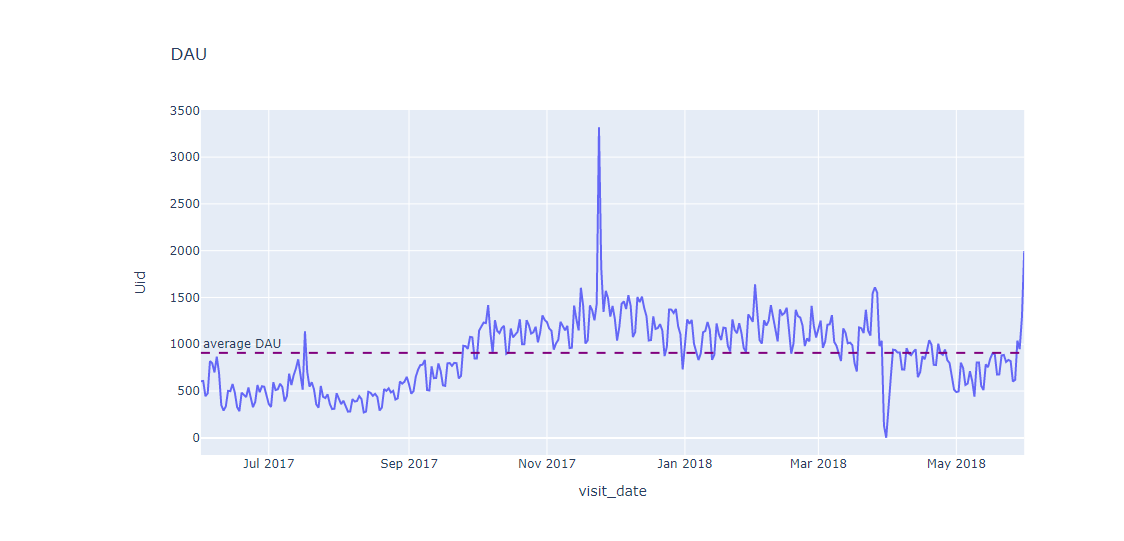

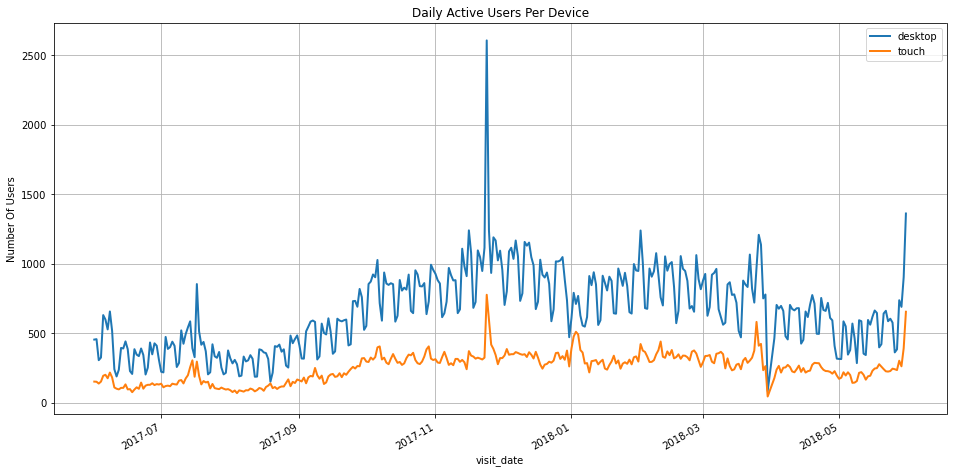

In [20]:
# visualize daily unique users pre device

dau_device_count.set_index('visit_date').plot(figsize=(16,8), grid=True, fontsize=10, lw=2)
plt.title('Daily Active Users Per Device')
plt.ylabel('Number Of Users')
plt.show()

In [21]:
# visualize daily unique users per device in plotly with average

#fig = px.line(dau_device_count,x="visit_date", y=["desktop", "touch"], title='DAU Per Device')
#fig.add_hline(y=dau_desktop_count['desktop'].mean(),line_dash="dash", line_color="purple", annotation_text="average DAU desktop",
#             annotation_position="top left")
#fig.add_hline(y=dau_touch_count['touch'].mean(),line_dash="dash", line_color="purple", annotation_text="average DAU touch",
#             annotation_position="top left")
#fig.show()

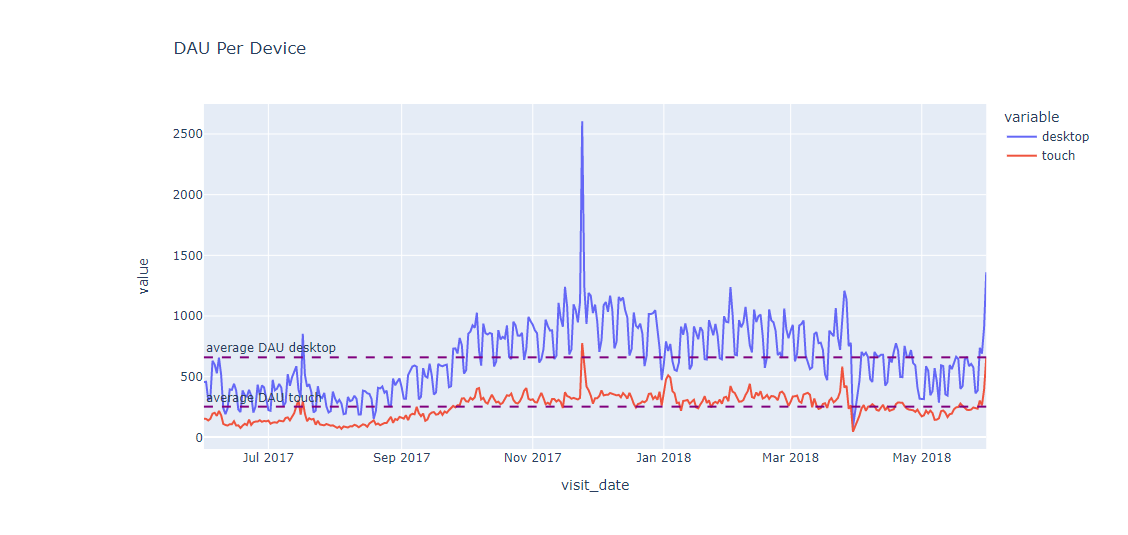

In [22]:
# getting weekly unique users

wau_count = visits.groupby('visit_week').agg({'Uid': 'nunique'}).reset_index()

In [23]:
# getting weekly unique users per device

wau_desktop_count = desktop.groupby('visit_week').agg({'Uid': 'nunique'}).reset_index()
wau_desktop_count = wau_desktop_count.rename(columns={'Uid': 'desktop'})

wau_touch_count = touch.groupby('visit_week').agg({'Uid': 'nunique'}).reset_index()
wau_touch_count = wau_touch_count.rename(columns={'Uid': 'touch'})

# merging weekly unique users per device

wau_device_count = wau_desktop_count.merge(wau_touch_count, on='visit_week')

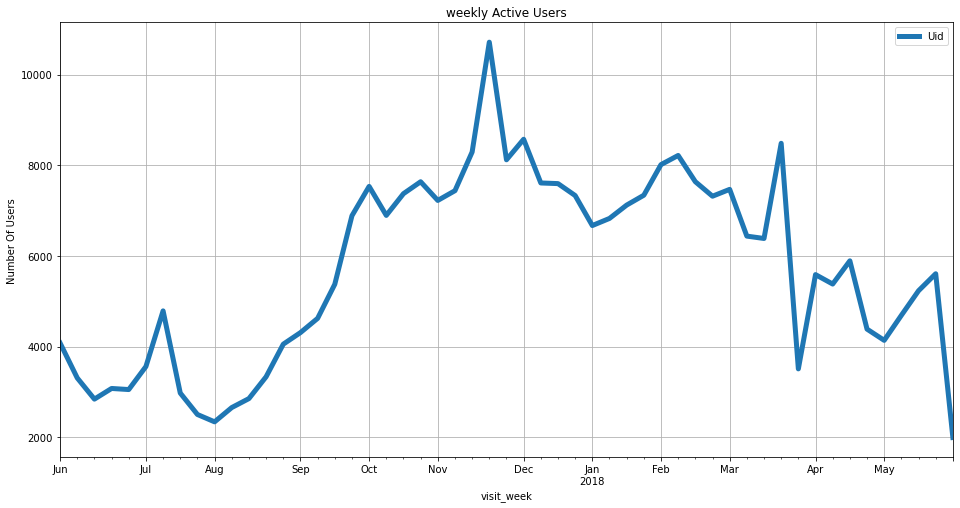

In [24]:
# visualize weekly unique users

wau_count.set_index('visit_week').plot(figsize=(16,8), grid=True, fontsize=10, lw=5)
plt.title('weekly Active Users')
plt.ylabel('Number Of Users')
plt.show()

In [25]:
# visualize weekly unique users in plotly with average

#fig = px.line(wau_count,x="visit_week", y="Uid",title='WAU')

#fig.add_hline(y=wau_count['Uid'].mean(),line_dash="dash", line_color="purple", annotation_text="average WAU",
#             annotation_position="top left")
#fig.show()

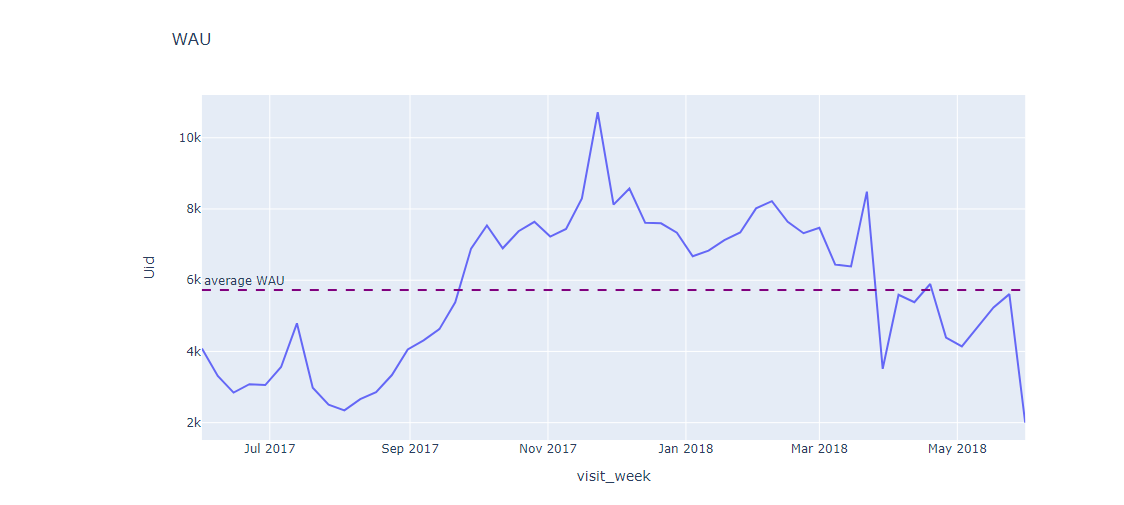

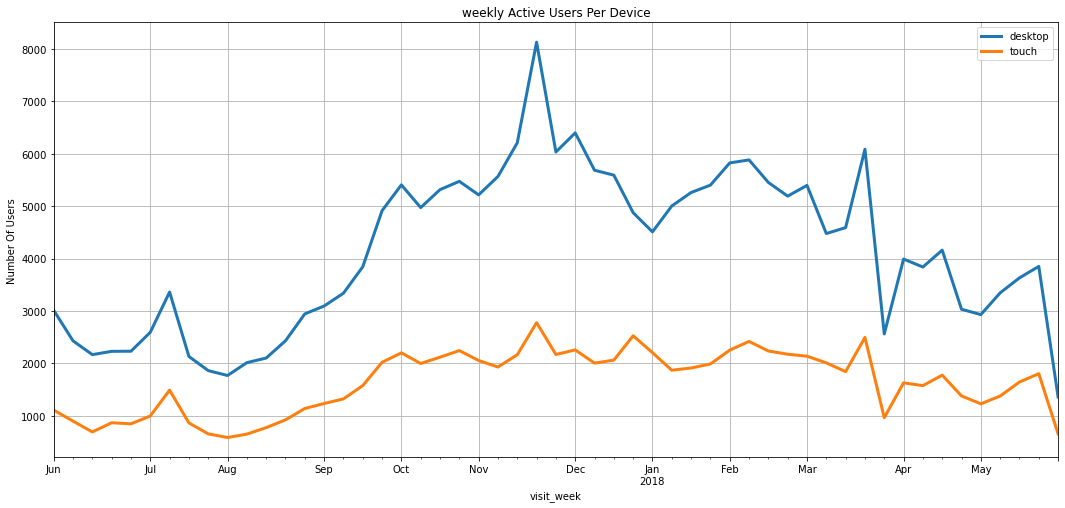

In [26]:
# visualize weekly unique users per device

wau_device_count.set_index('visit_week').plot(figsize=(18,8), grid=True, fontsize=10, lw=3)
plt.title('weekly Active Users Per Device')
plt.ylabel('Number Of Users')
plt.show()

In [27]:
# visualize weekly unique users per device in plotly with average

#fig = px.line(wau_device_count,x="visit_week", y=["desktop", "touch"], title='WAU Per Device')
#fig.add_hline(y=wau_desktop_count['desktop'].mean(),line_dash="dash", line_color="purple", annotation_text="average WAU desktop",
#             annotation_position="top left")
#fig.add_hline(y=wau_touch_count['touch'].mean(),line_dash="dash", line_color="purple", annotation_text="average WAU touch",
#             annotation_position="top left")
#fig.show()

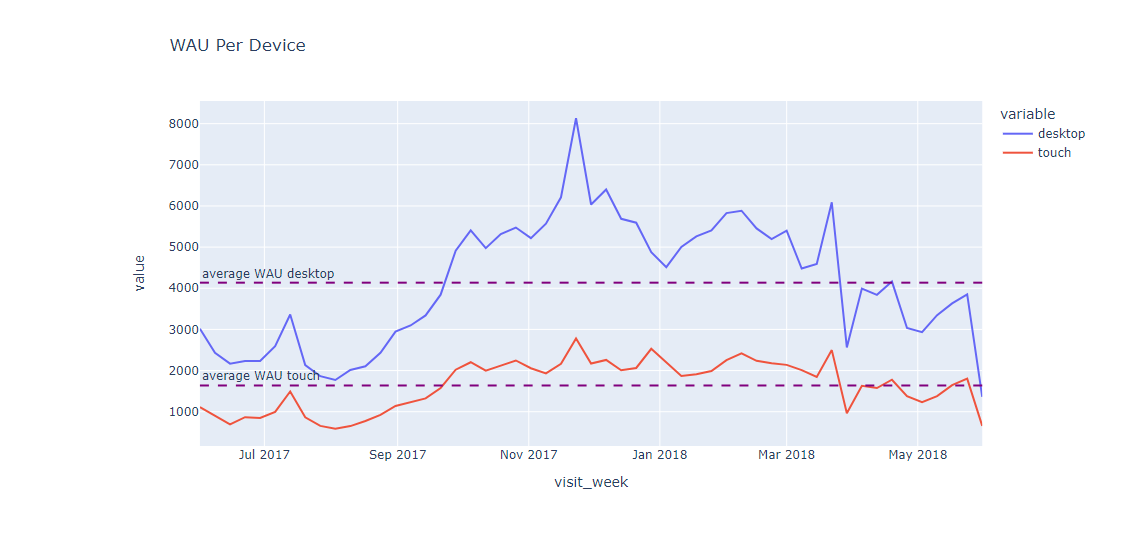

In [28]:
# getting monthly unique users

mau_count = visits.groupby('visit_month').agg({'Uid': 'nunique'}).reset_index()

In [29]:
# getting monthly unique users per device

mau_desktop_count = desktop.groupby('visit_month').agg({'Uid': 'nunique'}).reset_index()
mau_desktop_count = mau_desktop_count.rename(columns={'Uid': 'desktop'})

mau_touch_count = touch.groupby('visit_month').agg({'Uid': 'nunique'}).reset_index()
mau_touch_count = mau_touch_count.rename(columns={'Uid': 'touch'})

# merging monthly unique users per device

mau_device_count = mau_desktop_count.merge(mau_touch_count, on='visit_month')

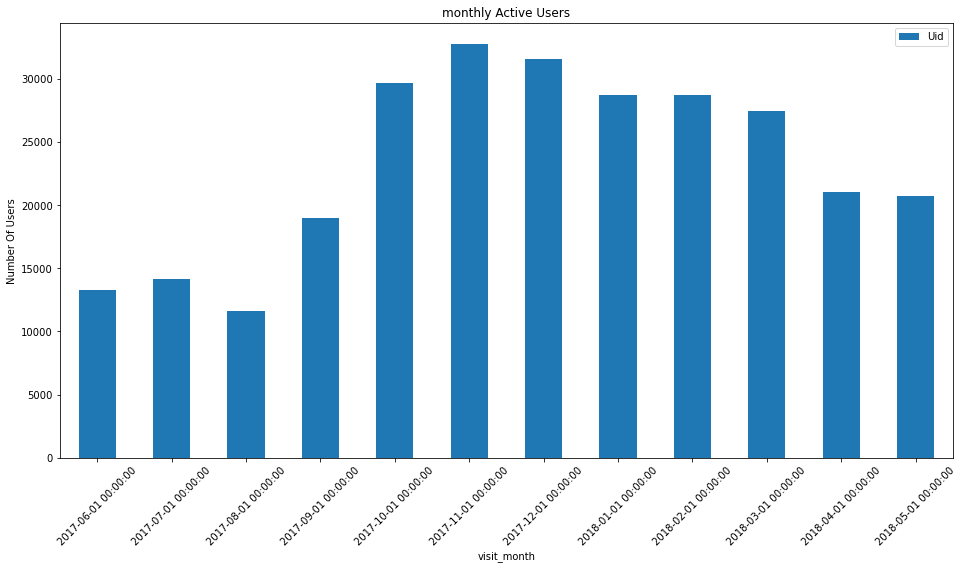

In [30]:
# visualize monthly unique users

mau_count.set_index('visit_month').plot(kind='bar', figsize=(16,8))
plt.title('monthly Active Users')
plt.ylabel('Number Of Users')
plt.xticks(rotation = 45)
plt.show()

In [31]:
# visualize monthly unique users in plotly with average

#fig = px.bar(mau_count, x='visit_month', y='Uid')
#fig.add_hline(y=mau_count['Uid'].mean(),line_dash="dash", line_color="purple", annotation_text="average MAU",
#             annotation_position="top left")
#fig.show()

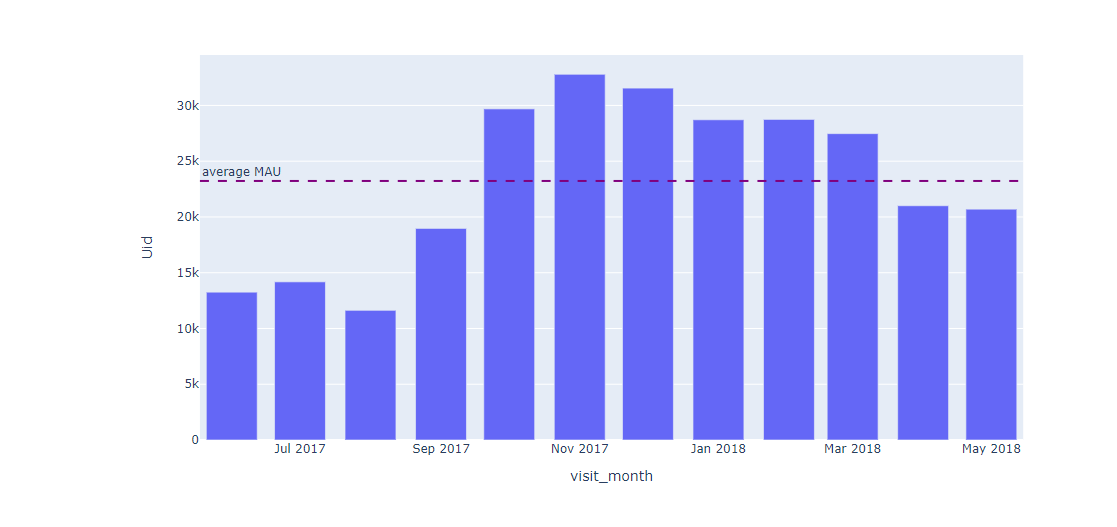

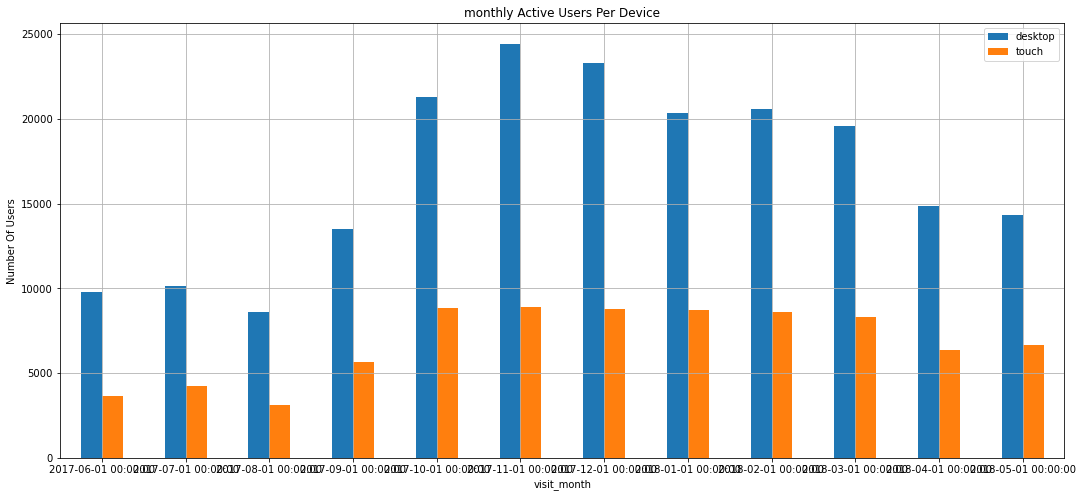

In [32]:
# visualize monthly unique users per device

mau_device_count.set_index('visit_month').plot(kind='bar', figsize=(18,8), grid=True, fontsize=10)
plt.title('monthly Active Users Per Device')
plt.ylabel('Number Of Users')
plt.xticks(rotation = 0)
plt.show()

In [33]:
# visualize monthly unique users per device in plotly, stacked

#fig = px.bar(mau_device_count, x='visit_month', y=['desktop', 'touch'], title='monthly Active Users Per Device')
#fig.show()

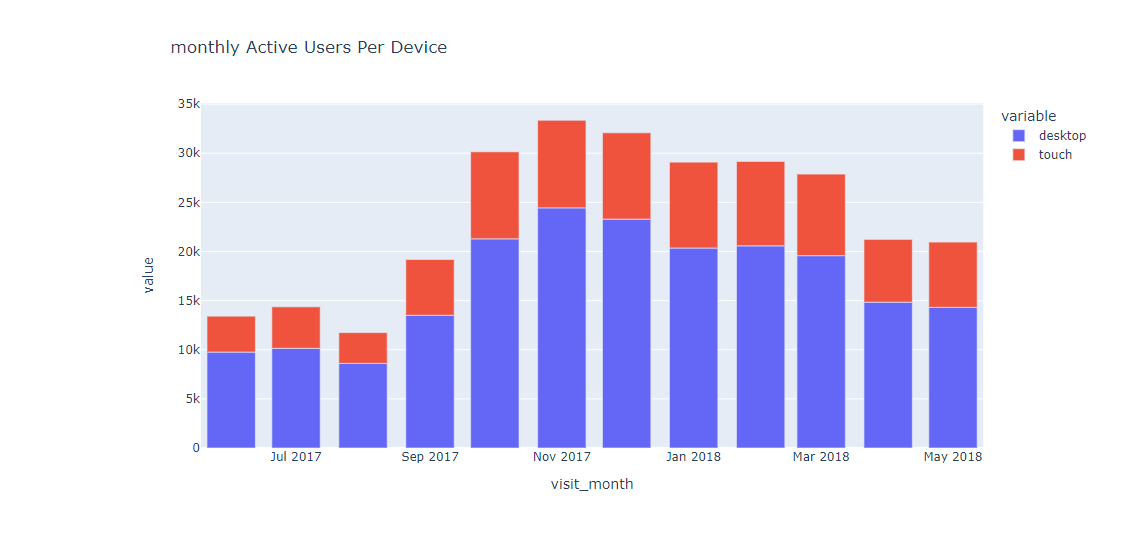

#### How many sessions are there per day? (One user might have more than one session.)

In [34]:
# getting the daily visits

visits_per_day = visits.groupby('visit_date')['Start Ts'].count().reset_index()

# getting the average daily visits

mean_visits_per_day = visits.groupby('visit_date').agg({'Start Ts': 'count'}).mean()

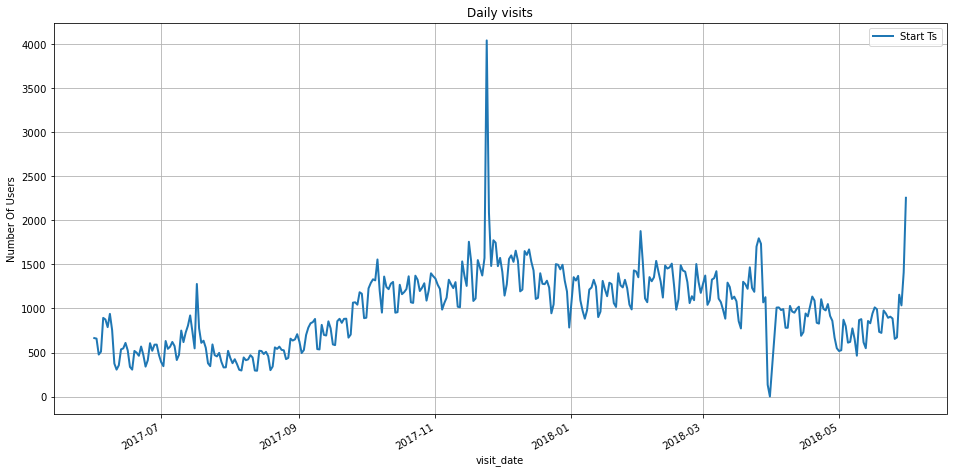

Average Visits Per Day: 987


In [35]:
# visualize the daily visits

visits_per_day.set_index('visit_date').plot(figsize=(16,8), grid=True, fontsize=10, lw=2)
plt.title('Daily visits')
plt.ylabel('Number Of Users')
plt.show()

# printing the average daily visits

print('Average Visits Per Day:', int(mean_visits_per_day))

In [36]:
# getting average daily visits, average unique visits, average visits per user

visits_per_day = visits_per_day.rename(columns={'Start Ts': 'daily visits'})
dau_count = dau_count.rename(columns={'Uid': 'daily user visits'})
compare = dau_count.merge(visits_per_day, on='visit_date')

mean_visits_daily = int(visits_per_day['daily visits'].mean())
mean_dau = int(dau_count['daily user visits'].mean())
mean_visits_per_user_per_day = round((mean_visits_daily / mean_dau), 3)

# printing the results

print('Average Visits Per Day:', mean_visits_daily)
print('Average Unique Visits Per Day:', mean_dau)
print('Average visits per user per day:', mean_visits_per_user_per_day)


Average Visits Per Day: 987
Average Unique Visits Per Day: 907
Average visits per user per day: 1.088


#### What is the length of each session?

In [37]:
# getting the average session length

visits['session_duration_sec'] = (visits['End Ts'] - visits['Start Ts']).dt.seconds
ASL_sec = visits['session_duration_sec'].mean()
ASL_min = ASL_sec / 60

# printing the results

print('average session length :', round(ASL_min, 1), 'minutes')

average session length : 10.7 minutes


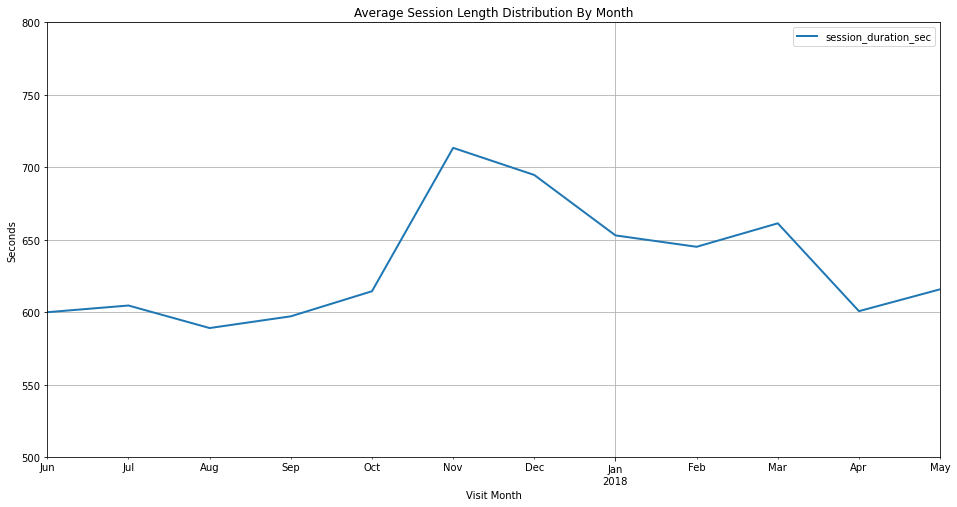

In [38]:
# getting and visualizing average session length per month

mean_by_month = visits.groupby('visit_month').agg({'session_duration_sec': 'mean'}).reset_index()

mean_by_month.set_index('visit_month').plot(figsize=(16,8), grid=True, fontsize=10, lw=2)
plt.ylim(500,800)
plt.title('Average Session Length Distribution By Month')
plt.ylabel('Seconds')
plt.xlabel('Visit Month')
plt.show()

In [39]:
# visualizing average session length per month in plotly with average

#fig = px.line(mean_by_month,x="visit_month", y='session_duration_sec', title='Average Session Length Distribution By Month')
#fig.add_hline(y=mean_by_month['session_duration_sec'].mean(),line_dash="dash", line_color="purple", annotation_text="average session length",
#             annotation_position="top left")
#fig.update_layout(yaxis_range=[500,800])
#fig.show()

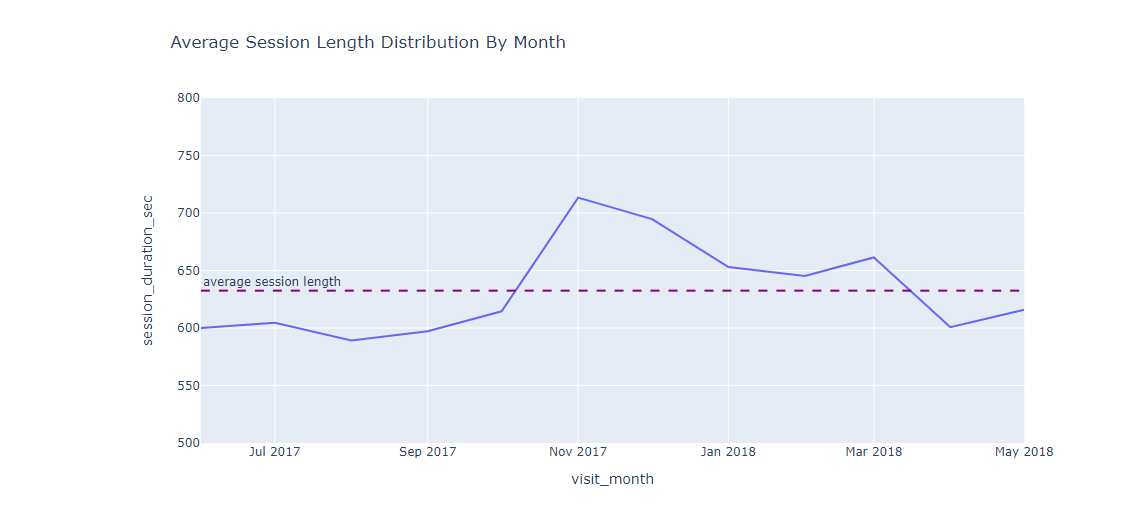

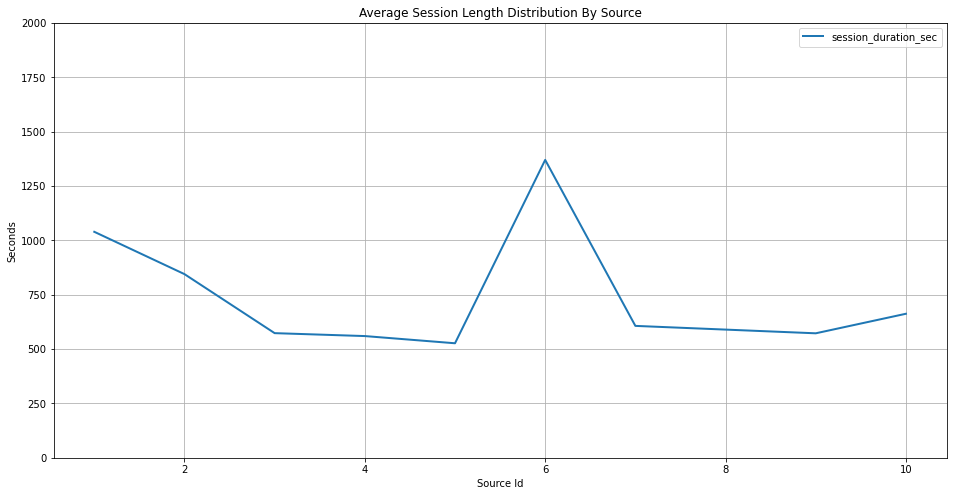

In [40]:
# getting and visualizing average session length per source

mean_by_source = visits.groupby('Source Id').agg({'session_duration_sec': 'mean'}).reset_index()

mean_by_source.set_index('Source Id').plot(figsize=(16,8), grid=True, fontsize=10, lw=2)
plt.ylim(0,2000)
plt.title('Average Session Length Distribution By Source')
plt.ylabel('Seconds')
plt.xlabel('Source Id')
plt.show()

In [41]:
# getting and visualizing average session length per source with plotly 

#fig = px.line(mean_by_source,x="Source Id", y='session_duration_sec', title='Average Session Length Distribution By Source')
#fig.add_hline(y=mean_by_source['session_duration_sec'].mean(),line_dash="dash", line_color="purple", annotation_text="average session length",
#             annotation_position="top left")
#fig.update_layout(yaxis_range=[0,2000])
#fig.show()

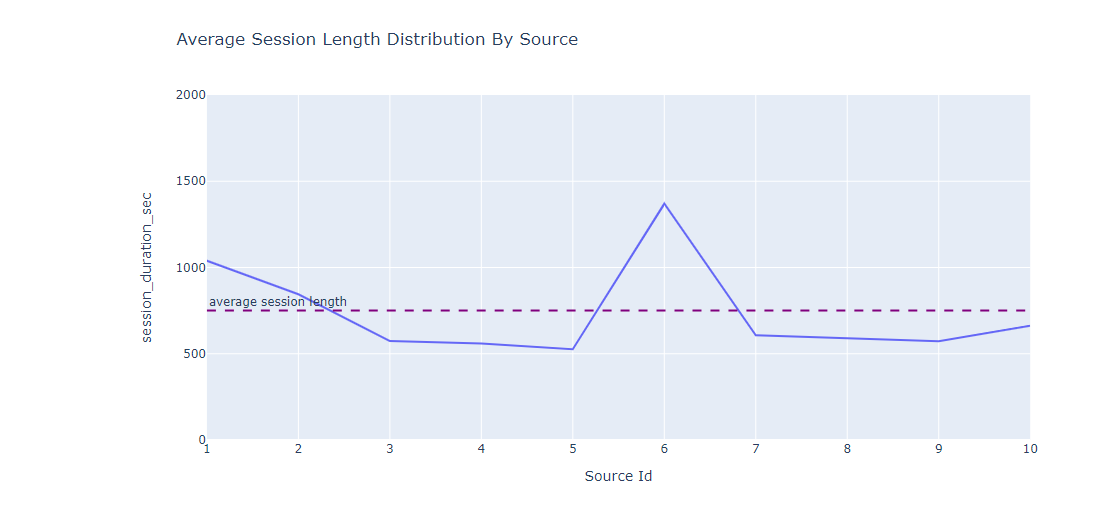

In [42]:
# getting the average session length per source

desktop['session_duration_sec'] = (desktop['End Ts'] - desktop['Start Ts']).dt.seconds
D_ASL_min = (desktop['session_duration_sec'].mean()) / 60

touch['session_duration_sec'] = (touch['End Ts'] - touch['Start Ts']).dt.seconds
T_ASL_min = (touch['session_duration_sec'].mean()) / 60

# printing the results

print('average desktop session length :', round(D_ASL_min, 1), 'minutes')
print('average touch session length :',round(T_ASL_min, 1), 'minutes')

average desktop session length : 11.7 minutes
average touch session length : 8.0 minutes


#### How often do users come back?

In [43]:
# adding first month column 
visits['activity_month'] = visits['first_visit_date'].astype('datetime64[M]')

In [44]:
# adding cohort lifetime column

visits['cohort_lifetime'] = pd.to_datetime(visits['visit_date']) - pd.to_datetime(visits['first_visit_date'])
visits['cohort_lifetime'] = visits['cohort_lifetime'] / np.timedelta64(1, 'M')
visits['cohort_lifetime'] = visits['cohort_lifetime'].round().astype(int)

In [45]:
# pivot table of cohorts

cohorts = visits.pivot_table(index='activity_month',
                  columns='cohort_lifetime',
                  values='Uid',
                  aggfunc='nunique')
cohorts

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11,12
activity_month,,,,,,,,,,,,,
2017-06-01,13259.0,976.0,718.0,805.0,910.0,891.0,844.0,743.0,738.0,666.0,547.0,534.0,167.0
2017-07-01,13140.0,739.0,688.0,699.0,738.0,648.0,587.0,653.0,483.0,389.0,315.0,72.0,NaN
2017-08-01,10181.0,702.0,633.0,598.0,517.0,436.0,418.0,350.0,295.0,238.0,29.0,NaN,NaN
2017-09-01,16704.0,1264.0,1124.0,817.0,660.0,672.0,552.0,436.0,331.0,43.0,NaN,NaN,NaN
2017-10-01,25977.0,1899.0,1376.0,987.0,938.0,815.0,548.0,467.0,84.0,NaN,NaN,NaN,NaN
2017-11-01,27248.0,1873.0,1276.0,1043.0,854.0,660.0,504.0,75.0,NaN,NaN,NaN,NaN,NaN
2017-12-01,25268.0,1288.0,1038.0,731.0,545.0,414.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,22624.0,1209.0,821.0,578.0,388.0,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,22197.0,1063.0,596.0,400.0,45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
# getting retention rates

retention=cohorts.iloc[:,0:].div(cohorts[0], axis=0)
retention

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11,12
activity_month,,,,,,,,,,,,,
2017-06-01,1.0,0.073610,0.054152,0.060713,0.068633,0.067200,0.063655,0.056037,0.055660,0.050230,0.041255,0.040275,0.012595
2017-07-01,1.0,0.056240,0.052359,0.053196,0.056164,0.049315,0.044673,0.049696,0.036758,0.029604,0.023973,0.005479,NaN
2017-08-01,1.0,0.068952,0.062175,0.058737,0.050781,0.042825,0.041057,0.034378,0.028976,0.023377,0.002848,NaN,NaN
2017-09-01,1.0,0.075670,0.067289,0.048910,0.039511,0.040230,0.033046,0.026102,0.019816,0.002574,NaN,NaN,NaN
2017-10-01,1.0,0.073103,0.052970,0.037995,0.036109,0.031374,0.021096,0.017977,0.003234,NaN,NaN,NaN,NaN
2017-11-01,1.0,0.068739,0.046829,0.038278,0.031342,0.024222,0.018497,0.002752,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.0,0.050974,0.041080,0.028930,0.021569,0.016384,0.002770,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.0,0.053439,0.036289,0.025548,0.017150,0.001945,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.0,0.047889,0.026850,0.018020,0.002027,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


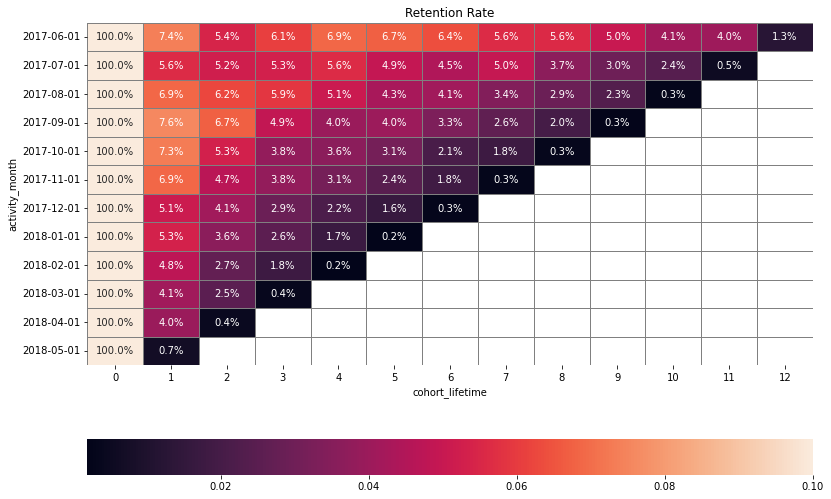

In [47]:
# visualizing retention rate 

plt.figure(figsize=(13, 9))
retention.index=retention.index.astype(str)
sns.heatmap(retention, annot=True, fmt='.1%', linewidths=1, linecolor='grey',  vmax=0.1, cbar_kws= {'orientation': 'horizontal'} 
            ).set(title = 'Retention Rate')
plt.show()

>* __there is higher activity between November and February, and a big drop between June and August.__
<br>

>* __the amount of users by desktop is more then double then the amount of users by touch screens.__
<br>

>* __there are average annualy 23k, monthly 5.5k and daily 900 users.__
<br>

>* __users visiting the app avrerage 1.1 times per day.__
<br>

>* __average session length 10.7 minutes, by desktop 11.7 minutes, by touch only 8 minutes.__
<br>

>* __average session length is lower between April and October, around 600 seconds, while from November to March its higher, around 650 seconds.__
<br>

>* __average session length per source has a bigger differences. only three sources are higher, while the rest are around 500-600 seconds on average. source 2 is average 850 seconds and sources 1 and 6 are over 1000 seconds.__
<br>

>* __the retention rates are logically decreasing over time, .we can see that as newer a user is, his retention rates are lower then the same lifetime month of older user, which suggest that maybe the user experience is worse, or the interface is outdated. in the last two full cohorts(3-4.2018) the decreasing is faster and the retention rates are the lowest ever, looks like theres a need for a change.__ 

## Sales

### When do people start buying?

In [48]:
# adding source_id to orders

dict_ = dict(zip(visits['Uid'], visits['Source Id']))
orders['source_id'] = orders['Uid'].map(dict_)

In [49]:
orders.head()

,Buy Ts,Revenue,Uid,source_id
0,2017-06-01 00:10:00,17.00,10329302124590727494,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2
2,2017-06-01 00:27:00,0.37,17903680561304213844,2
3,2017-06-01 00:29:00,0.55,16109239769442553005,2
4,2017-06-01 07:58:00,0.37,14200605875248379450,3


In [50]:
# create id first order table 

first_order_date = orders.groupby('Uid')['Buy Ts'].min().reset_index()

# merging with id first visit table

first_order_date = first_order_date.join(first_visit_date, how='left',  on=['Uid'])

# get date from first order column

first_order_date['Buy Ts'] = first_order_date['Buy Ts'].dt.date
first_order_date = first_order_date.rename(columns={'Buy Ts': 'first_order_date'})

# change column type to datetime

first_order_date['first_order_date'] = pd.to_datetime(first_order_date['first_order_date'])

# create conversion column by days
first_order_date['conversion']=((pd.to_datetime(first_order_date['first_order_date'])-pd.to_datetime(first_order_date['first_visit_date'])))/np.timedelta64(1,'D')

# change type to integer

first_order_date['conversion'] = first_order_date['conversion'].astype(int)

# getting source 

first_order_date['source'] = orders['Uid'].map(dict_)
first_order_date.head()

,Uid,first_order_date,first_visit_date,conversion,source
0,313578113262317,2018-01-03,2017-09-18,107,1
1,1575281904278712,2017-06-03,2017-06-03,0,2
2,2429014661409475,2017-10-11,2017-10-11,0,2
3,2464366381792757,2018-01-28,2018-01-27,1,2
4,2551852515556206,2017-11-24,2017-11-24,0,3


In [108]:
#fig = px.histogram(first_order_date, x='conversion', nbins=200, range_x=[0, 20], title='Days Between First Visit and Conversion')
#fig.update_layout(yaxis_title="Number of Conversions")
#fig.update_layout(xaxis_title="Number of Days")
#fig.show()

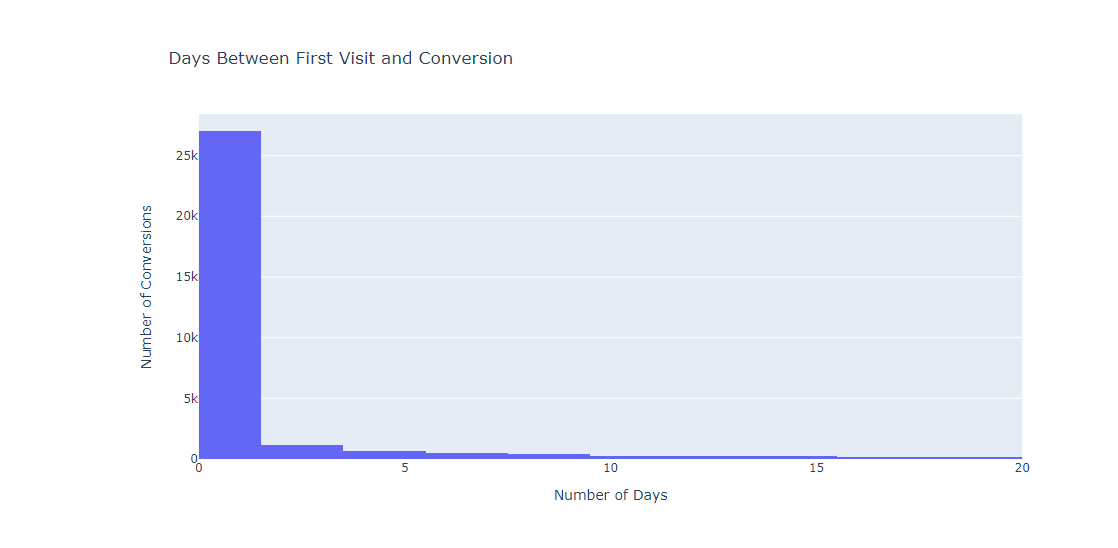

In [52]:
days_to_order = first_order_date['conversion'].median()
print("Average Time For Costumer's First Purchase:",round(days_to_order), 'Days')

Average Time For Costumer's First Purchase: 0 Days


> __Our clients are fast, most of them are buying in the first day of registration__

In [53]:
first_order_date.head(2)

,Uid,first_order_date,first_visit_date,conversion,source
0,313578113262317,2018-01-03,2017-09-18,107,1
1,1575281904278712,2017-06-03,2017-06-03,0,2


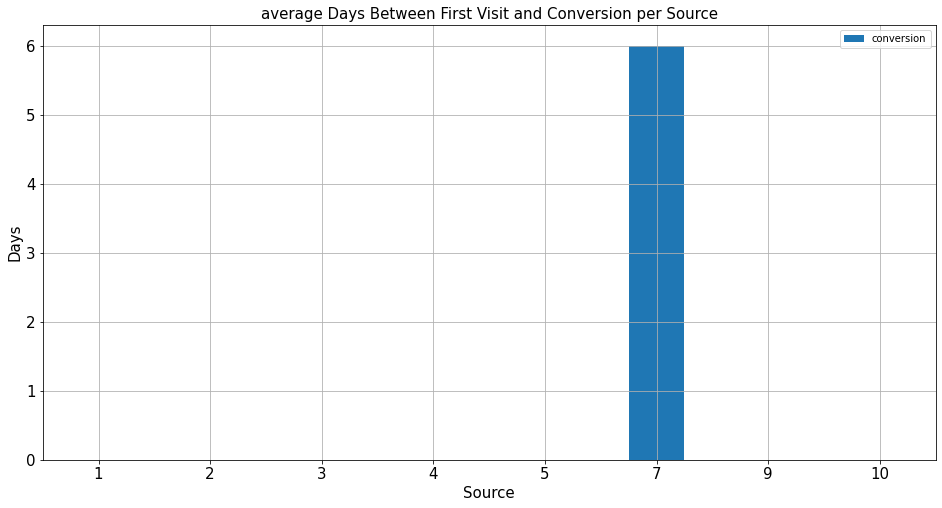

In [54]:
# grouping first order by source

first_by_source = first_order_date.groupby('source')['conversion'].median().reset_index()

# visualize average days between first visit and conversion

first_by_source.set_index('source').plot(kind='bar', figsize=(16,8), grid=True, fontsize=15, lw=2)
plt.title('average Days Between First Visit and Conversion per Source', fontsize=15)
plt.ylabel('Days', fontsize=15)
plt.xlabel('Source', fontsize=15)
plt.xticks(rotation = 0)
plt.show()

In [55]:
# checking for overall conversion rate

print(' The overall conversion is {:.1%}'.format(orders['Uid'].nunique()/visits['Uid'].nunique()))

 The overall conversion is 16.0%


### How many orders do they make during a given period of time?

In [56]:
orders.head()

,Buy Ts,Revenue,Uid,source_id
0,2017-06-01 00:10:00,17.00,10329302124590727494,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2
2,2017-06-01 00:27:00,0.37,17903680561304213844,2
3,2017-06-01 00:29:00,0.55,16109239769442553005,2
4,2017-06-01 07:58:00,0.37,14200605875248379450,3


In [57]:
# getting date from buy_ts  column

orders['Buy Ts'] = orders['Buy Ts'].dt.date

In [58]:
# getting first order date

first_order = orders.groupby(['Uid'])['Buy Ts'].min().reset_index()
first_order.columns = ['Uid', 'first_order']
first_order.head()

,Uid,first_order
0,313578113262317,2018-01-03
1,1575281904278712,2017-06-03
2,2429014661409475,2017-10-11
3,2464366381792757,2018-01-28
4,2551852515556206,2017-11-24


In [59]:
# adding first order date to orders table

orders = orders.merge(first_order, how='left',on=['Uid'])

In [60]:
# getting month of order and first order

orders['first_order_month'] = orders['first_order'].astype('datetime64[M]')
orders['order_month'] = orders['Buy Ts'].astype('datetime64[M]')

In [61]:
orders.head()

,Buy Ts,Revenue,Uid,source_id,first_order,first_order_month,order_month
0,2017-06-01,17.00,10329302124590727494,1,2017-06-01,2017-06-01,2017-06-01
1,2017-06-01,0.55,11627257723692907447,2,2017-06-01,2017-06-01,2017-06-01
2,2017-06-01,0.37,17903680561304213844,2,2017-06-01,2017-06-01,2017-06-01
3,2017-06-01,0.55,16109239769442553005,2,2017-06-01,2017-06-01,2017-06-01
4,2017-06-01,0.37,14200605875248379450,3,2017-06-01,2017-06-01,2017-06-01


In [62]:
# checking for number of unique first orders per month

cohort_size = orders.groupby('first_order_month').agg({'Uid': 'nunique'}).reset_index()
cohort_size.columns=['first_order_month','cohort_size']
cohort_size.head()

,first_order_month,cohort_size
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


In [63]:
# checking for number of unique orders for each month by the first month

cohort = orders.groupby(['first_order_month','order_month'])['Revenue'].count().reset_index()
cohort.columns=['first_order_month','month','orders']
cohort.head()

,first_order_month,month,orders
0,2017-06-01,2017-06-01,2354
1,2017-06-01,2017-07-01,177
2,2017-06-01,2017-08-01,174
3,2017-06-01,2017-09-01,226
4,2017-06-01,2017-10-01,292


In [64]:
# merging cohorts

cohort = cohort.merge(cohort_size,on=['first_order_month'])

# getting cohort month

cohort['age_month'] = ((cohort['month'] - cohort['first_order_month']) / np.timedelta64(1,'M')).round()

# total orders per unique user

cohort['orders_per_buyer']=cohort['orders']/cohort['cohort_size']
cohort.head()

,first_order_month,month,orders,cohort_size,age_month,orders_per_buyer
0,2017-06-01,2017-06-01,2354,2023,0.0,1.163618
1,2017-06-01,2017-07-01,177,2023,1.0,0.087494
2,2017-06-01,2017-08-01,174,2023,2.0,0.086011
3,2017-06-01,2017-09-01,226,2023,3.0,0.111715
4,2017-06-01,2017-10-01,292,2023,4.0,0.144340


In [65]:
# pivot table of cohorts

cohort_piv=cohort.pivot_table(
    index='first_order_month', 
    columns='age_month', 
    values='orders_per_buyer', 
    aggfunc='sum'
).cumsum(axis=1)
cohort_piv.round(2)

age_month,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
first_order_month,,,,,,,,,,,,
2017-06-01,1.16,1.25,1.34,1.45,1.59,1.70,1.84,1.92,2.03,2.10,2.15,2.19
2017-07-01,1.14,1.19,1.25,1.31,1.34,1.39,1.42,1.44,1.47,1.49,1.51,NaN
2017-08-01,1.12,1.20,1.27,1.33,1.39,1.44,1.47,1.53,1.56,1.60,NaN,NaN
2017-09-01,1.14,1.22,1.28,1.35,1.37,1.42,1.46,1.48,1.50,NaN,NaN,NaN
2017-10-01,1.14,1.22,1.25,1.28,1.31,1.34,1.35,1.38,NaN,NaN,NaN,NaN
2017-11-01,1.18,1.28,1.32,1.37,1.41,1.42,1.45,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.15,1.21,1.26,1.30,1.32,1.34,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.12,1.19,1.24,1.25,1.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.12,1.18,1.21,1.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


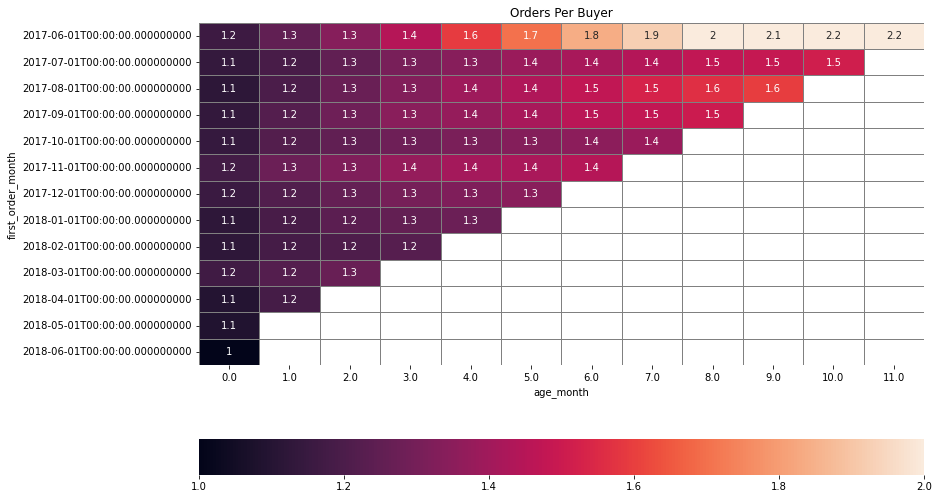

In [66]:
# visualising cohorts pivot table

plt.figure(figsize=(13, 9))
sns.heatmap(cohort_piv, annot=True, linewidths=1, linecolor='grey',  vmax=2, cbar_kws= {'orientation': 'horizontal'} 
            ).set(title = 'Orders Per Buyer')
plt.show()

>* __the overall conversion rate, from all visits, is 16%.__
<br>

>* __The vast majority of customers made the first purchase on the first day they visit the app.__
<br>

>* __for paying customers the behavior is more similar between older and newer costumers than the visitors behavior. the best customers are the first month cohort ones, who bought first, while the rest are pretty similar.__

### What is the average purchase size?

In [67]:
# What is the average purchase size?

average_purchase = orders['Revenue'].mean()
print('average purchase:', round(average_purchase))
orders.head()

average purchase: 5


,Buy Ts,Revenue,Uid,source_id,first_order,first_order_month,order_month
0,2017-06-01,17.00,10329302124590727494,1,2017-06-01,2017-06-01,2017-06-01
1,2017-06-01,0.55,11627257723692907447,2,2017-06-01,2017-06-01,2017-06-01
2,2017-06-01,0.37,17903680561304213844,2,2017-06-01,2017-06-01,2017-06-01
3,2017-06-01,0.55,16109239769442553005,2,2017-06-01,2017-06-01,2017-06-01
4,2017-06-01,0.37,14200605875248379450,3,2017-06-01,2017-06-01,2017-06-01


In [68]:
# average revenue per month 

avg_cohort=orders.groupby(['first_order_month','order_month'])['Revenue'].mean().reset_index()
avg_cohort['age_month'] = ((avg_cohort['order_month'] - avg_cohort['first_order_month']) / np.timedelta64(1,'M')).round()
avg_cohort.head()

,first_order_month,order_month,Revenue,age_month
0,2017-06-01,2017-06-01,4.060106,0.0
1,2017-06-01,2017-07-01,5.547006,1.0
2,2017-06-01,2017-08-01,5.088161,2.0
3,2017-06-01,2017-09-01,8.545575,3.0
4,2017-06-01,2017-10-01,7.084178,4.0


In [69]:
# pivot table of average monthly revenue cohorts

avg_cohort_pivot = avg_cohort.pivot_table(
index='first_order_month', 
columns='age_month',
values='Revenue',
aggfunc='mean'
).round(2)
avg_cohort_pivot

age_month,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
first_order_month,,,,,,,,,,,,
2017-06-01,4.06,5.55,5.09,8.55,7.08,6.83,6.97,6.76,5.28,8.01,12.04,6.04
2017-07-01,5.29,6.45,9.99,6.64,4.72,3.66,3.79,5.45,5.35,11.79,5.65,NaN
2017-08-01,4.72,5.99,6.28,6.62,7.96,6.27,5.89,7.11,8.70,5.60,NaN,NaN
2017-09-01,4.97,13.17,8.35,62.57,15.43,15.32,16.77,11.21,7.79,NaN,NaN,NaN
2017-10-01,4.37,7.41,5.13,5.59,5.10,5.07,4.28,4.01,NaN,NaN,NaN,NaN
2017-11-01,4.37,4.10,4.47,6.28,4.44,3.73,4.60,NaN,NaN,NaN,NaN,NaN
2017-12-01,4.11,4.23,20.07,26.08,15.95,14.11,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,3.69,4.44,6.45,7.52,2.71,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,3.71,4.58,3.45,3.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


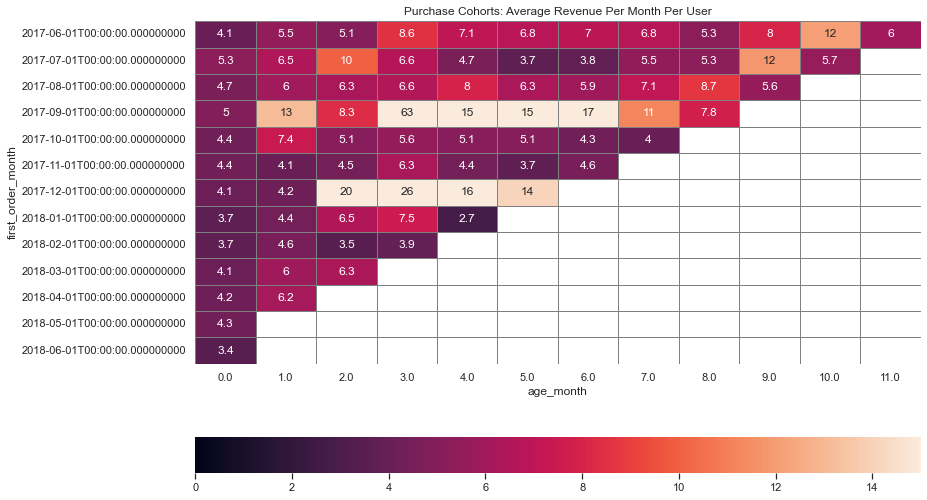

In [70]:
# visualize average monthly revenue cohorts

sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Purchase Cohorts: Average Revenue Per Month Per User')
sns.heatmap(
    avg_cohort_pivot, annot=True, linewidths=1, linecolor='gray', vmin=0, vmax=15, cbar_kws= {'orientation': 'horizontal'}
) 
plt.show()

In [71]:
# average revenue per source

avg_cohort=orders.groupby(['source_id'])['Revenue'].mean().reset_index().round(2).sort_values(by='Revenue', ascending=False)
avg_cohort.head()

,source_id,Revenue
1,2,8.65
0,1,6.12
4,5,4.44
3,4,4.10
2,3,4.02


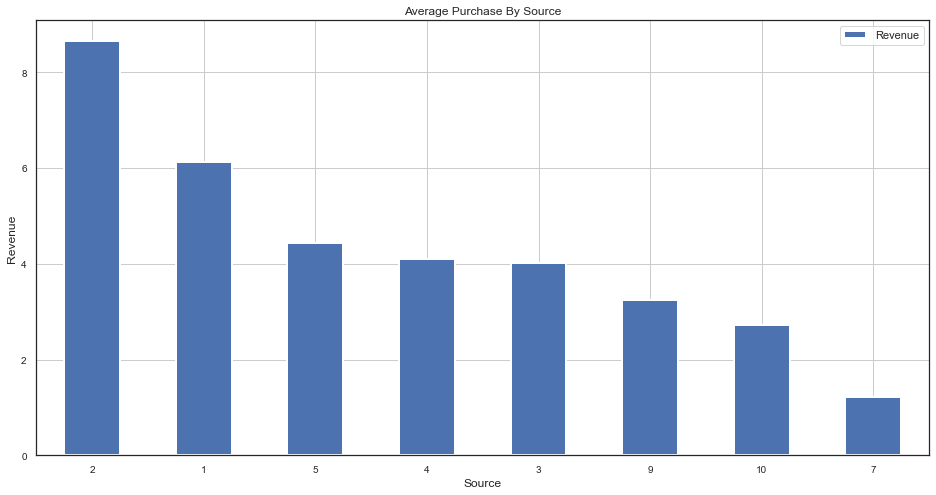

In [72]:
# visualize average revenue per source

avg_cohort.set_index('source_id').plot(kind='bar', figsize=(16,8), grid=True, fontsize=10, lw=2)
plt.title('Average Purchase By Source')
plt.ylabel('Revenue')
plt.xlabel('Source')
plt.xticks(rotation = 0)
plt.show()

### How much money do they bring? (LTV)

In [73]:
orders.head()

,Buy Ts,Revenue,Uid,source_id,first_order,first_order_month,order_month
0,2017-06-01,17.00,10329302124590727494,1,2017-06-01,2017-06-01,2017-06-01
1,2017-06-01,0.55,11627257723692907447,2,2017-06-01,2017-06-01,2017-06-01
2,2017-06-01,0.37,17903680561304213844,2,2017-06-01,2017-06-01,2017-06-01
3,2017-06-01,0.55,16109239769442553005,2,2017-06-01,2017-06-01,2017-06-01
4,2017-06-01,0.37,14200605875248379450,3,2017-06-01,2017-06-01,2017-06-01


In [74]:
# unique buyers per month

n_buyers = orders.groupby('first_order_month').agg({'Uid': 'nunique'}).reset_index()
n_buyers = n_buyers.rename(columns = {'Uid': 'n_buyers'})
n_buyers.head()

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


In [75]:
# revenue per month per cohort

cohorts = orders.groupby(['first_order_month', 'order_month']).agg({'Revenue':'sum'}).reset_index()
cohorts = cohorts.merge(n_buyers, on='first_order_month')
cohorts.head()

,first_order_month,order_month,Revenue,n_buyers
0,2017-06-01,2017-06-01,9557.49,2023
1,2017-06-01,2017-07-01,981.82,2023
2,2017-06-01,2017-08-01,885.34,2023
3,2017-06-01,2017-09-01,1931.30,2023
4,2017-06-01,2017-10-01,2068.58,2023


In [76]:
# indexing cohorts by first month conversion

cohorts['age'] = (cohorts['order_month'] - cohorts['first_order_month']) / np.timedelta64(1, 'M')
cohorts['age'] = cohorts['age'].round().astype(int)
cohorts['ltr'] = cohorts['Revenue'] / cohorts['n_buyers']
cohorts.head()

,first_order_month,order_month,Revenue,n_buyers,age,ltr
0,2017-06-01,2017-06-01,9557.49,2023,0,4.724414
1,2017-06-01,2017-07-01,981.82,2023,1,0.485329
2,2017-06-01,2017-08-01,885.34,2023,2,0.437637
3,2017-06-01,2017-09-01,1931.30,2023,3,0.954671
4,2017-06-01,2017-10-01,2068.58,2023,4,1.022531


In [77]:
# pivot table of cohorts

output = cohorts.pivot_table(
index = 'first_order_month',
columns = 'age',
values = 'ltr', 
aggfunc='mean').round(2).cumsum(axis=1)
output

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.72,5.21,5.65,6.60,7.62,8.36,9.31,9.89,10.44,11.05,11.62,11.88
2017-07-01,6.01,6.35,6.97,7.33,7.51,7.67,7.79,7.93,8.09,8.24,8.40,NaN
2017-08-01,5.28,5.75,6.21,6.60,7.09,7.37,7.58,7.99,8.28,8.47,NaN,NaN
2017-09-01,5.64,6.76,7.28,11.26,11.66,12.31,13.01,13.25,13.43,NaN,NaN,NaN
2017-10-01,5.00,5.54,5.73,5.89,6.04,6.16,6.24,6.36,NaN,NaN,NaN,NaN
2017-11-01,5.15,5.55,5.75,6.07,6.22,6.27,6.38,NaN,NaN,NaN,NaN,NaN
2017-12-01,4.74,5.00,5.93,7.00,7.31,7.65,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,4.14,4.43,4.73,4.87,4.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,4.16,4.44,4.52,4.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


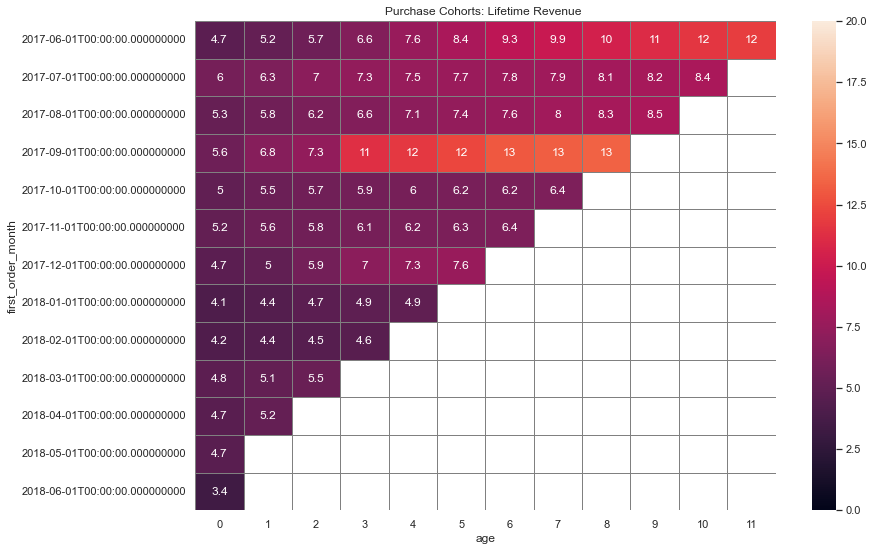

In [78]:
# visualizing LTV

plt.figure(figsize=(13, 9))
plt.title('Purchase Cohorts: Lifetime Revenue ')
sns.heatmap(
    output, annot=True, linewidths=1, linecolor='gray', vmin=0, vmax=20
) 
plt.show()

>* __the average purchase is 5, while we can see that the first purchase is around 4 - 4.5.__
<br>

>* __there are cohorts where there are high positive outliers, mostly on 9,12-2017 users. we also can see that the most of the outliers for both cohorts were on the sale months, February-May 2018.__
<br>

>* __there are few more cohorts with high positive outliers, but it seem to be random.__
<br>

>* __the highest average purchase by source are coming from source 2 (more than 8) followed by source 1 (6) , where source number 2 DOUBLE exceeding the rest!__
<br>

>* __the lowest average purchase are coming from sources 9 and 10. i am not analyzing source number 7 because i will show later that it has only 1 purchase coming from it.__
<br>

>* __there are two cohorts with higher LTV then the others, our first loyal customers of June 2017, and September 2017.__
<br>

>* __the 4 first cohorts looks like the must profitable.__
<br>

>* __cohort of December 2017 looks like a potentially higher profitable than the other new cohorts.__

## Marketing

### How much money was spent? Overall/per source/over time

In [79]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [80]:
# total expenses

total_costs = costs['costs'].sum()
print('Money spent overall:', total_costs)

Money spent overall: 329131.62


In [81]:
# total expenses per source

costs_per_source = costs.groupby('source_id').agg({'costs': 'sum'}).reset_index()
costs_per_source = costs_per_source.rename(columns = {'source_id': 'source'})
costs_per_source

,source,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


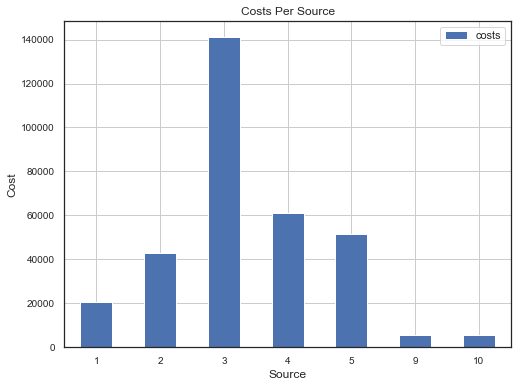

In [82]:
# visualizing total expenses per source

costs_per_source.plot.bar(x = 'source',y = 'costs', figsize=(8,6), grid=True, fontsize=10)
plt.title('Costs Per Source')
plt.xlabel('Source')
plt.ylabel('Cost')
plt.xticks(rotation = 0)
plt.show()

In [109]:
# visualize daily expenses per source

#fig = px.line(costs, x="dt", y="costs", color='source_id')
#fig.update_layout(xaxis_title="month")
#fig.show()

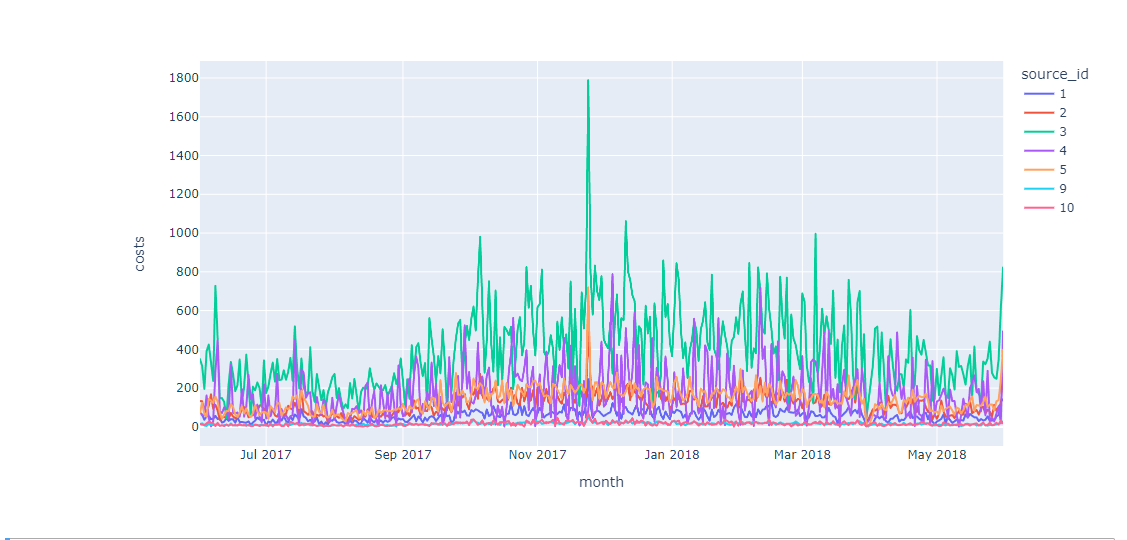

In [84]:
# get month from expenses date

costs['month'] = costs['dt'].astype('datetime64[M]')

# get monthly costs 

costs_per_month = costs.groupby('month').agg({'costs': 'sum'}).reset_index()
costs_per_month.head()

,month,costs
0,2017-06-01,18015.00
1,2017-07-01,18240.59
2,2017-08-01,14790.54
3,2017-09-01,24368.91
4,2017-10-01,36322.88


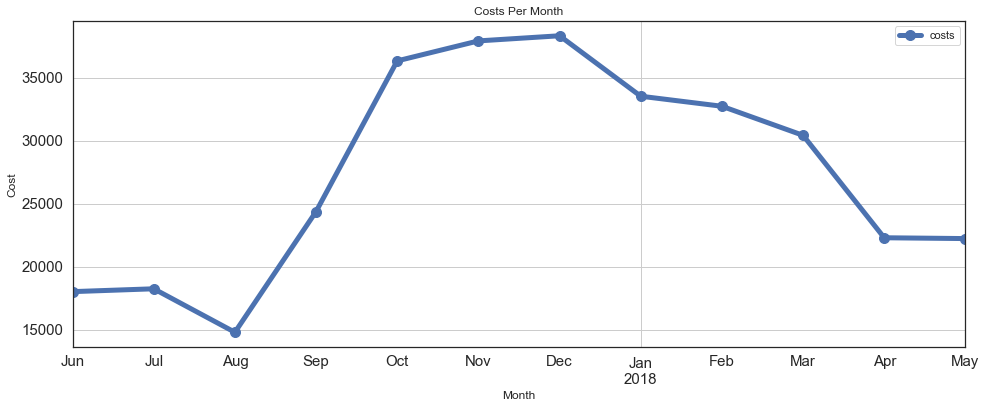

In [85]:
# visualize monthly costs

costs_per_month.plot(x= 'month', y='costs', figsize=(16,6), style='o-', grid=True, lw=5, ms=10, fontsize=15)
plt.title('Costs Per Month')
plt.ylabel('Cost')
plt.xlabel('Month')
plt.show()

>* __total costs spent are 330k.__
<br>

>* __40% the total costs were spent on source 3__
<br>

>* __50% of the total costs were spent on the next sources, 2, 4 and 5__
<br>

>* __the vast majority of the costs were spent between the months October 2017 and March 2018.__
<br>

>* __there was a peak in costs in December, possible because of seasonality.__
<br>

>* __the lowest costs months were June - August 2017.__

### How much did customer acquisition from each of the sources cost? (CAC)

In [86]:
costs.head(2)

,source_id,dt,costs,month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01


In [87]:
# average customer acquisition cost

total_buyers = orders.Uid.nunique()
average_cac = total_costs / total_buyers
print('Average customer acquisition:', round(average_cac, 2))

Average customer acquisition: 9.01


In [88]:
# monthly costs 

costs['cost_month'] = costs['dt'].astype('datetime64[M]')
costs_by_month = costs.groupby(['cost_month'])['costs'].sum().reset_index()
costs_by_month.head()

,cost_month,costs
0,2017-06-01,18015.00
1,2017-07-01,18240.59
2,2017-08-01,14790.54
3,2017-09-01,24368.91
4,2017-10-01,36322.88


In [89]:
# number of buyers per month

buyers_per_month = orders.groupby(['first_order_month'])['Uid'].nunique().reset_index()
buyers_per_month.columns = ['cost_month','buyers']
buyers_per_month.head()

,cost_month,buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


In [90]:
# monthly customer acquisition cost

CAC_per_month = costs_by_month.merge(buyers_per_month,how='left',on=['cost_month'])
CAC_per_month['CAC'] = CAC_per_month['costs']/CAC_per_month['buyers']
CAC_per_month['CAC'] = round(CAC_per_month['CAC'], 2)
CAC_per_month.head()

,cost_month,costs,buyers,CAC
0,2017-06-01,18015.00,2023,8.91
1,2017-07-01,18240.59,1923,9.49
2,2017-08-01,14790.54,1370,10.80
3,2017-09-01,24368.91,2581,9.44
4,2017-10-01,36322.88,4340,8.37


In [110]:
# visualize monthly customer acquisition cost

#fig = px.line(CAC_per_month, x="cost_month", y="CAC", title='monthly customer acquisition cost')
#fig.add_hline(y=CAC_per_month['CAC'].mean(),line_dash="dash", line_color="purple", annotation_text="average CAC",
#             annotation_position="top left")
#fig.update_layout(xaxis_title="Month")
#fig.show()

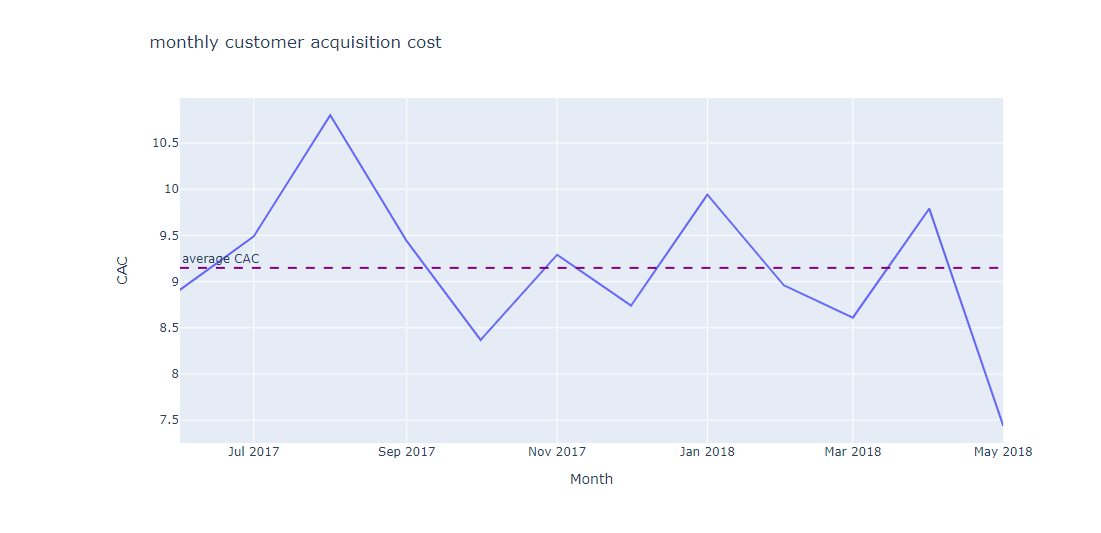

>* __the average cost for customer acquisition is 9__
<br>

>* __on the busy season, when there are more marketing costs, on months October to March, there are four months where the average cost was under the average (October, December, February and March), and two months over the average(November and January).__
<br>

>* __the highest cost for customer acquisition was on August.__

In [92]:
# first visit source

first_source = visits.sort_values('visit_date').groupby('Uid').first()['Source Id'].reset_index()
first_source.columns = ['Uid','first_source']
first_source.head()

,Uid,first_source
0,11863502262781,3
1,49537067089222,2
2,297729379853735,3
3,313578113262317,2
4,325320750514679,5


In [93]:
# merging first visit source to orders table

orders = orders.merge(first_source,on=['Uid'],how='left')
orders.head()

,Buy Ts,Revenue,Uid,source_id,first_order,first_order_month,order_month,first_source
0,2017-06-01,17.00,10329302124590727494,1,2017-06-01,2017-06-01,2017-06-01,1
1,2017-06-01,0.55,11627257723692907447,2,2017-06-01,2017-06-01,2017-06-01,2
2,2017-06-01,0.37,17903680561304213844,2,2017-06-01,2017-06-01,2017-06-01,2
3,2017-06-01,0.55,16109239769442553005,2,2017-06-01,2017-06-01,2017-06-01,2
4,2017-06-01,0.37,14200605875248379450,3,2017-06-01,2017-06-01,2017-06-01,3


In [94]:
# get month from expenses date

costs['cost_month'] = costs['dt'].astype('datetime64[M]')
costs.head()

,source_id,dt,costs,month,cost_month
0,1,2017-06-01,75.20,2017-06-01,2017-06-01
1,1,2017-06-02,62.25,2017-06-01,2017-06-01
2,1,2017-06-03,36.53,2017-06-01,2017-06-01
3,1,2017-06-04,55.00,2017-06-01,2017-06-01
4,1,2017-06-05,57.08,2017-06-01,2017-06-01


In [95]:
# get costs by month per source

costs_by_month_source = costs.groupby(['cost_month','source_id'])['costs'].sum().reset_index()
costs_by_month_source.head()

,cost_month,source_id,costs
0,2017-06-01,1,1125.61
1,2017-06-01,2,2427.38
2,2017-06-01,3,7731.65
3,2017-06-01,4,3514.80
4,2017-06-01,5,2616.12


In [96]:
orders.head()

,Buy Ts,Revenue,Uid,source_id,first_order,first_order_month,order_month,first_source
0,2017-06-01,17.00,10329302124590727494,1,2017-06-01,2017-06-01,2017-06-01,1
1,2017-06-01,0.55,11627257723692907447,2,2017-06-01,2017-06-01,2017-06-01,2
2,2017-06-01,0.37,17903680561304213844,2,2017-06-01,2017-06-01,2017-06-01,2
3,2017-06-01,0.55,16109239769442553005,2,2017-06-01,2017-06-01,2017-06-01,2
4,2017-06-01,0.37,14200605875248379450,3,2017-06-01,2017-06-01,2017-06-01,3


In [97]:
# number of buyers by month per source

buyers_per_month_source = orders.groupby(['first_order_month','first_source'])['Uid'].nunique().reset_index()
buyers_per_month_source.columns = ['cost_month','source_id','buyers']
buyers_per_month_source.head()

,cost_month,source_id,buyers
0,2017-06-01,1,213
1,2017-06-01,2,241
2,2017-06-01,3,616
3,2017-06-01,4,405
4,2017-06-01,5,389


In [98]:
# CAC by month per source

CAC_per_month_source = costs_by_month_source.merge(buyers_per_month_source,how='left',on=['cost_month','source_id'])
CAC_per_month_source['CAC'] = CAC_per_month_source['costs'] / CAC_per_month_source['buyers']
CAC_per_month_source.head()

,cost_month,source_id,costs,buyers,CAC
0,2017-06-01,1,1125.61,213,5.284554
1,2017-06-01,2,2427.38,241,10.072116
2,2017-06-01,3,7731.65,616,12.551380
3,2017-06-01,4,3514.80,405,8.678519
4,2017-06-01,5,2616.12,389,6.725244


In [112]:
# visualize CAC by month per source

#fig = px.line(CAC_per_month_source, x="cost_month", y="CAC",color='source_id',title='CAC by month per source')
#fig.update_layout(xaxis_title="Month")
#fig.show()

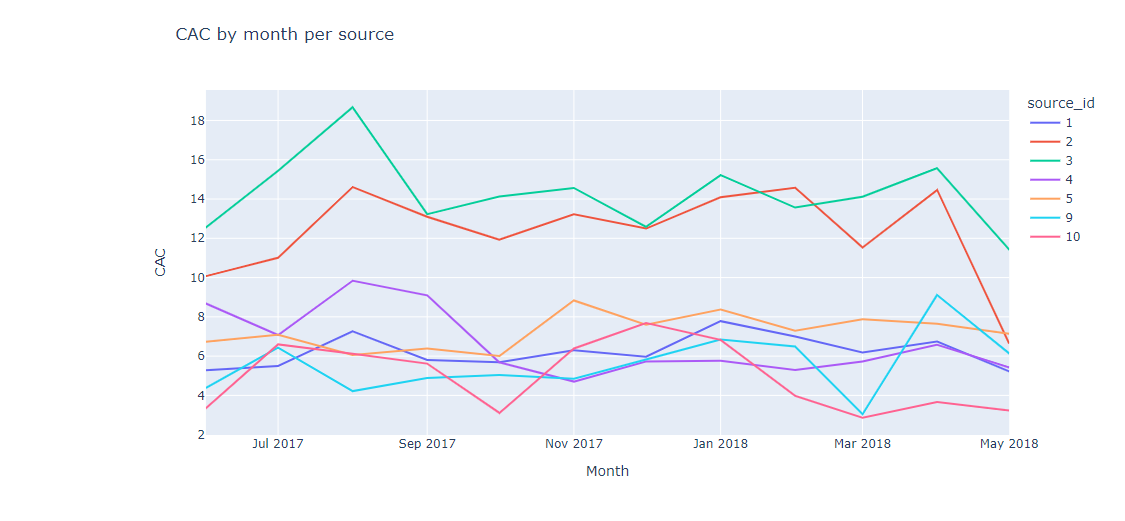

In [100]:
# average CAC per source

average_cac_per_source = CAC_per_month_source.groupby('source_id')['CAC'].mean().reset_index()
average_cac_per_source

,source_id,CAC
0,1,6.228497
1,2,12.310401
2,3,14.255045
3,4,6.631797
4,5,7.251147
5,9,5.604490
6,10,4.951045


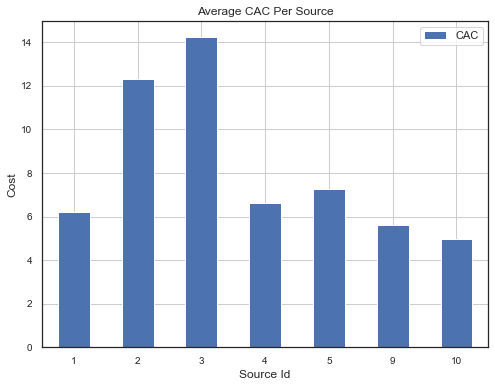

In [101]:
# visualize average CAC per source

average_cac_per_source.plot.bar(x = 'source_id',y = 'CAC', figsize=(8,6), grid=True, fontsize=10)
plt.title('Average CAC Per Source')
plt.xlabel('Source Id')
plt.ylabel('Cost')
plt.xticks(rotation = 0)
plt.show()

>* __the highest sources to acquire customer are 2 and 3, while the rest are pretty similar, while 1, 9 and 10 are the cheapest.__
<br>

>* __on March 2018 there were a drastic decrease on customer aqcisition costs for sources 9 and 10.__
<br>

>* __on August and February were the highest customer aqcisition costs for sources 2 and 3.__

### How worthwhile were the investments? (ROI)

In [102]:
# merging cohorts with monthly CAC

CAC_per_month_ROI=CAC_per_month[['cost_month','CAC']]
CAC_per_month_ROI.columns=['first_order_month','CAC']
ROI = cohorts.merge(CAC_per_month_ROI,on=['first_order_month'],how='left')
ROI.head()

,first_order_month,order_month,Revenue,n_buyers,age,ltr,CAC
0,2017-06-01,2017-06-01,9557.49,2023,0,4.724414,8.91
1,2017-06-01,2017-07-01,981.82,2023,1,0.485329,8.91
2,2017-06-01,2017-08-01,885.34,2023,2,0.437637,8.91
3,2017-06-01,2017-09-01,1931.30,2023,3,0.954671,8.91
4,2017-06-01,2017-10-01,2068.58,2023,4,1.022531,8.91


In [103]:
# calculate ROI

ROI['ROI']=ROI['ltr']/ROI['CAC']

# pivot table ROI per cohort

roi_piv = ROI.pivot_table(
    index='first_order_month', columns='age', values='ROI', aggfunc='mean'
).cumsum(axis=1).round(2) 

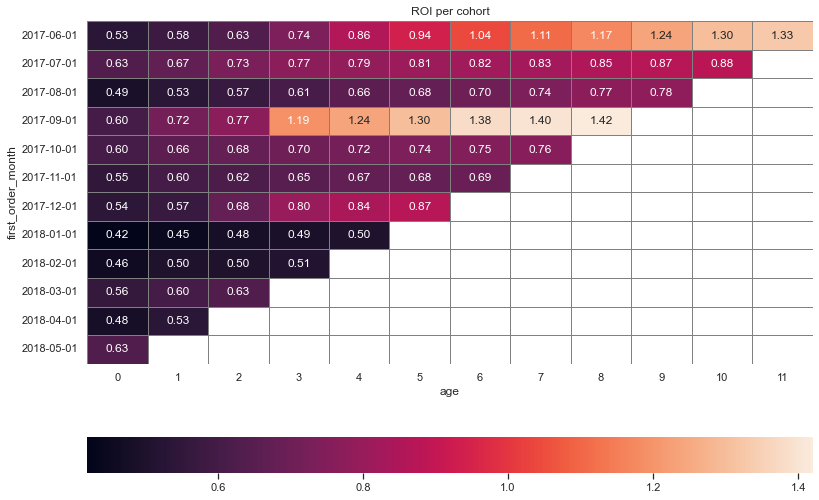

In [104]:
# visualize ROI per cohort

plt.figure(figsize=(13, 9))
roi_piv.index=roi_piv.index.astype(str)
sns.heatmap(roi_piv, annot=True, fmt='.2f', linewidths=1, linecolor='grey', cbar_kws= {'orientation': 'horizontal'} 
            ).set(title ='ROI per cohort')
plt.show()

>* __there are only 2 cohorts of buyers who returned the investment fully and are profitable, out first loyal customers of June 2017, and September 2017.__
<br>

>* __the cohort of December 2017 has a faster roi gainings then the other cohorts.__
<br>

>* __looks like cohorts of July, August and December 2017 are about to fully return the investment and bieng profitable.__
<br>

>* __the last full 4 cohorts, or since the starting of 2018, are returning the investment slower then the 2017 cohorts.__

In [105]:
# lifetime revenue per source

ltr_per_source = orders.groupby(['first_source'])['Uid','Revenue'].agg({'Uid':'nunique','Revenue':'sum'}).reset_index()
ltr_per_source.columns = ['source','buyers','revenue']
ltr_per_source['ltr'] = ltr_per_source['revenue'] / ltr_per_source['buyers']
ltr_per_source

,source,buyers,revenue,ltr
0,1,3365,34797.27,10.340942
1,2,3556,45335.95,12.749142
2,3,10137,51958.06,5.125585
3,4,9999,55387.40,5.539294
4,5,7109,54442.14,7.658199
5,7,1,1.22,1.220000
6,9,1054,5538.50,5.254744
7,10,1302,4596.66,3.530461


>* __only customers coming from sources 1 and 2 are profitable!__
<br>

>* __source 4 is the next with high lifetime revenue per customer.__

In [106]:
# get CAC per source

roi_per_source = costs_per_source.merge(ltr_per_source,on=['source'])
roi_per_source['cac'] = roi_per_source['costs'] / roi_per_source['buyers']

# get return on marketing investment per source

roi_per_source['romi'] = roi_per_source['ltr'] / roi_per_source['cac']
roi_per_source

,source,costs,buyers,revenue,ltr,cac,romi
0,1,20833.27,3365,34797.27,10.340942,6.191165,1.670274
1,2,42806.04,3556,45335.95,12.749142,12.037694,1.059102
2,3,141321.63,10137,51958.06,5.125585,13.941169,0.367658
3,4,61073.60,9999,55387.40,5.539294,6.107971,0.906896
4,5,51757.10,7109,54442.14,7.658199,7.280504,1.051878
5,9,5517.49,1054,5538.50,5.254744,5.234810,1.003808
6,10,5822.49,1302,4596.66,3.530461,4.471959,0.789466


In [113]:
# visualize ROMI per source

#fig = px.bar(roi_per_source, x='source', y='romi', title='ROMI per Source')
#fig.update_xaxes(type='category')
#fig.show()

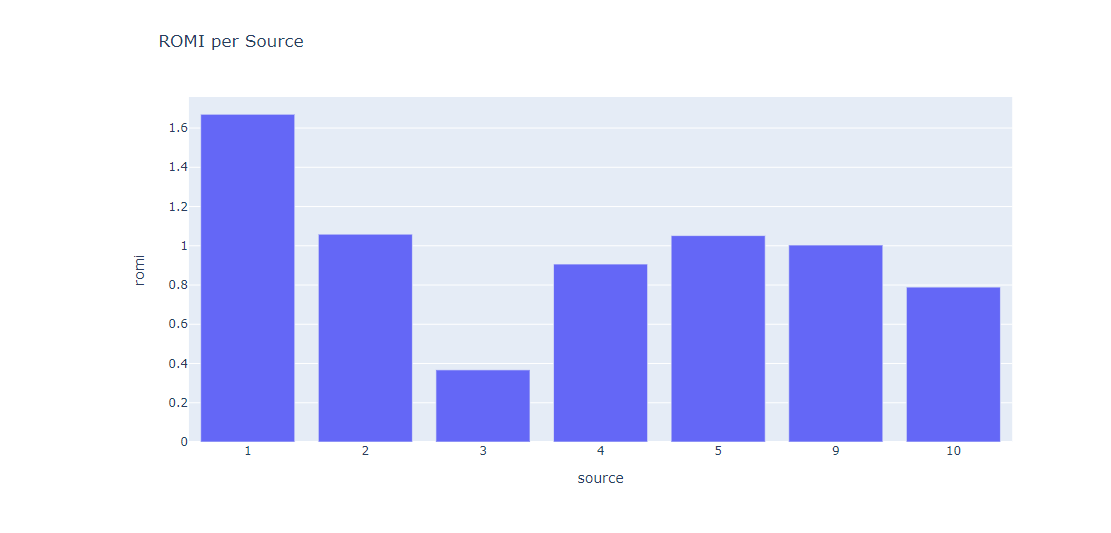

>* __the source with the highest ROMI is source 1.__
<br>

>* __the other sources with ROMI larger than 1 are sources 2, 5 and 9.__
<br>

>* __source 3 has by far the lowest ROMI.__

## Conclusion

>__generally about the app:__
<br>

>* __the most of the activity on app happens on months October - March as well as the expenses. my suggestion is to try to build a summer attractive package of possible products (tickets) that can be marketed as a 'sale', and try to set aside some expenses to test its profitability.__
<br>

>* __the must of the customers are making 1 purchase with the app - for an app that selling tickets i believe that it could and should be changed, because if a customer will come back for a second purchase, i believe that the chances are that he will keep buying more times through the app. its not to test in this projet, but only average 1 of 10 customers is going to a second show within the same year? personally, it looks like a low number to me. the company should spare resources for thinking of how to make better retention rates of buyers, after the first purchase.__
<br>

>__marketing:__
<br>

>* __the average purchase is 5.__
<br>

>* __the highest average purchase by source are coming from source 2 (more than 8) followed by source 1 (6) , where source number 2 DOUBLE exceeding the rest!__
<br>

>* __the highest CAC is spent on sources 2 and 3, while the rest are pretty similar. within the rest, source 1 is in the middle.__
>* __the highest LTV by source are coming from sources 1 and 2, while source 4 is the third one on the list.__
<br>

>* __in the ROMI metric, the results are even more clear. source 1 is the biggest winner and the only other profitable sources are 2, 5 and 9.__
<br>

>* __source 3 has the worst by far ROMI!__
<br>

>__final conclusion:__
<br>

>* __50% of the marketing expenses spent on source 3, which i show is the worst source by the important metrics of CAC, and ROMI, and not more then somewhere middle in other metrics like average purchase.__
<br>

>* __source 1 is the leading source on LTV, ROMI and average purchase, while the company spend 8% of the marketing costs on it.__
<br>

>* __sources 2, 4 and 5 are standing out in some metrics, not enough to call them winners as well, but enough to test what happen if we budget them more.__
<br>

>* __my conclusion is that the company should devide the marketing expenses differently by sources, somewhere around this numbers:__
<br>

>* __40% source 1__
>* __15% source 2__
>* __10% source 4__
>* __15% source 5__
>* __10% source 9__
>* __10% all other sources__
